In [1]:
%pylab --no-import-all inline
%config InlineBackend.figure_format = 'retina'
from pmd_beamphysics import ParticleGroup, particle_paths
from copy import copy
from distgen import Generator
import h5py

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
DISTGEN_IN = """
    n_particle: 1000
    r_dist:
      truncation_fraction:
        units: dimensionless
        value: 0.5
      truncation_radius:
        units: mm
        value: 2.3319043122
      type: rg
    random_type: hammersley
    start:
      MTE:
        units: meV
        value: 130
      type: cathode
    t_dist:
      alpha:
        units: ''
        value: 0.1
      sigma_t:
        units: ns
        value: 0.08287285705
      type: sg
    total_charge:
      units: nC
      value: 1
    """
D = Generator(DISTGEN_IN)
D.run()
P0 = D.particles
P0.write('initial_particles.h5')

## bunch_comb

In [2]:
def load_centroid(FILE):
    raw = np.loadtxt(FILE,usecols=range(1,27),skiprows=2)
    keys = "N-Live       S-Pos        Time    Polarization        <Sx>          <Sy>          <Sz>             <x>          <px>           <y>          <py>           <z>          <pz>         <p0c>           Sig_x        Sig_px         Sig_y        Sig_py         Sig_z        Sig_pz          Emit_a        Emit_b        Emit_c      Norm_Emit_a   Norm_Emit_b   Norm_Emit_c".split()
    data = dict()
    for i in range(len(keys)):
        data[keys[i]] = raw[:,i]
    return data

In [3]:
def load_sigma(FILE):
    raw = np.loadtxt(FILE,usecols=range(1,25),skiprows=2)
    keys = "N-Live       S-Pos        Time           <x.x>        <x.px>         <x.y>        <x.py>         <x.z>        <x.pz>       <px.px>        <px.y>       <px.py>        <px.z>       <px.pz>         <y.y>        <y.py>         <y.z>        <y.pz>       <py.py>        <py.z>       <py.pz>         <z.z>        <z.pz>       <pz.pz>".split()
    data = dict()
    for i in range(len(keys)):
        data[keys[i]] = raw[:,i]
    return data

In [4]:
centroid = load_centroid('100k.centroid')

sigma = load_sigma('100k.sigma')

Text(0, 0.5, 'energy')

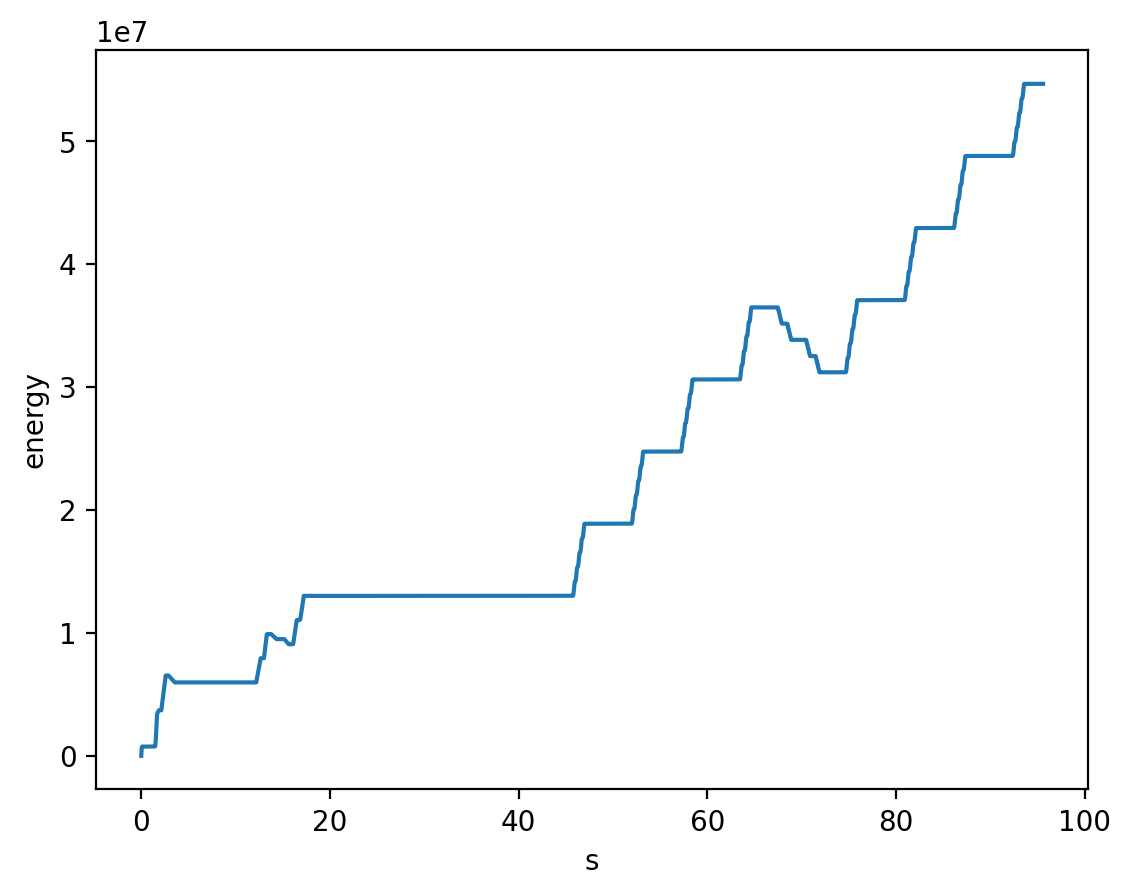

In [5]:
plt.plot(centroid['S-Pos'],centroid['<p0c>']*(1+centroid['<pz>']))
plt.xlabel('s')
plt.ylabel('energy')

Text(0, 0.5, 'Norm_Emit_c')

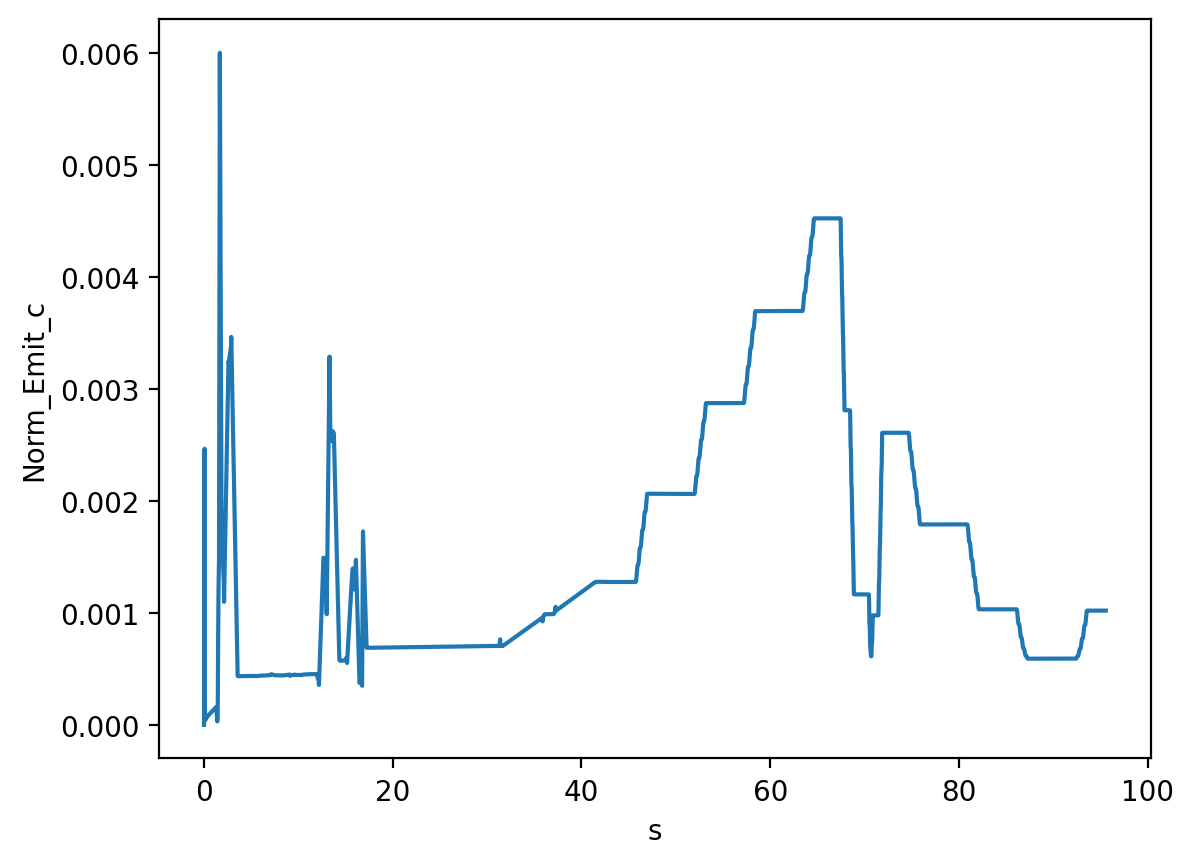

In [5]:
plt.plot(centroid['S-Pos'],centroid['Norm_Emit_c'])
plt.xlabel('s')
plt.ylabel('Norm_Emit_c')

Text(0, 0.5, 'Norm_Emit_b [um-rad]')

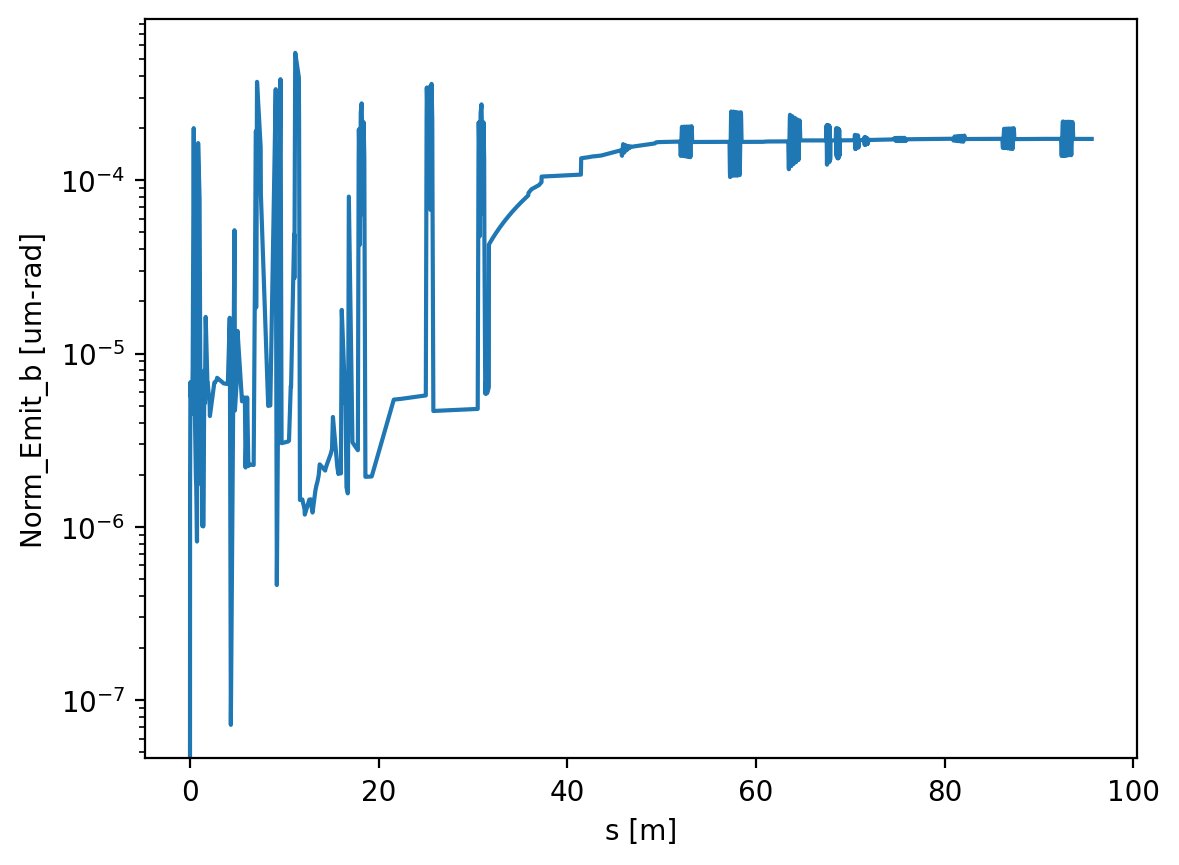

In [16]:
plt.semilogy(centroid['S-Pos'],centroid['Norm_Emit_b'])
#plt.plot(centroid['S-Pos'],centroid['Norm_Emit_b'])
plt.xlabel('s [m]')
plt.ylabel('Norm_Emit_b [um-rad]')
#plt.xlim([0,20])

Text(0, 0.5, 'Emit')

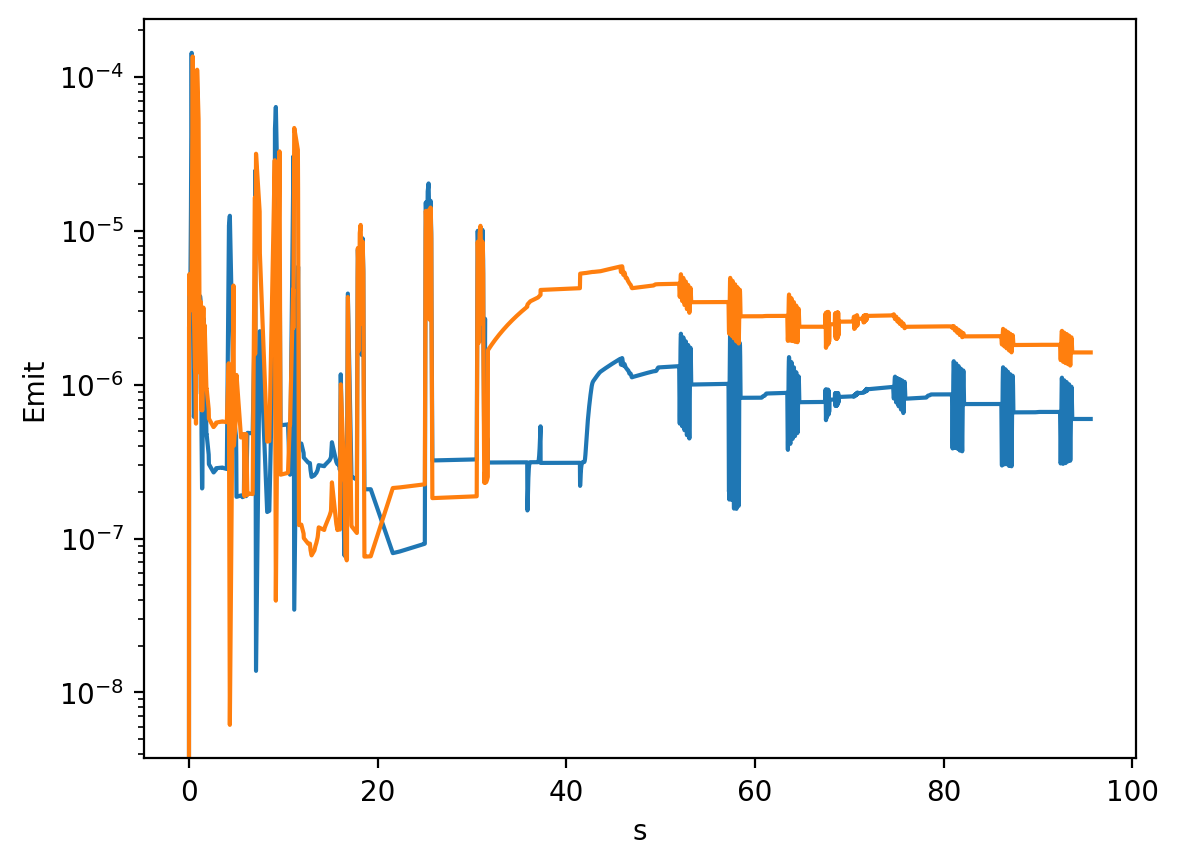

In [27]:
plt.semilogy(centroid['S-Pos'],centroid['Emit_a'])
plt.plot(centroid['S-Pos'],centroid['Emit_b'])
plt.xlabel('s')
plt.ylabel('Emit')

Text(0, 0.5, 'sigma_x [mm]')

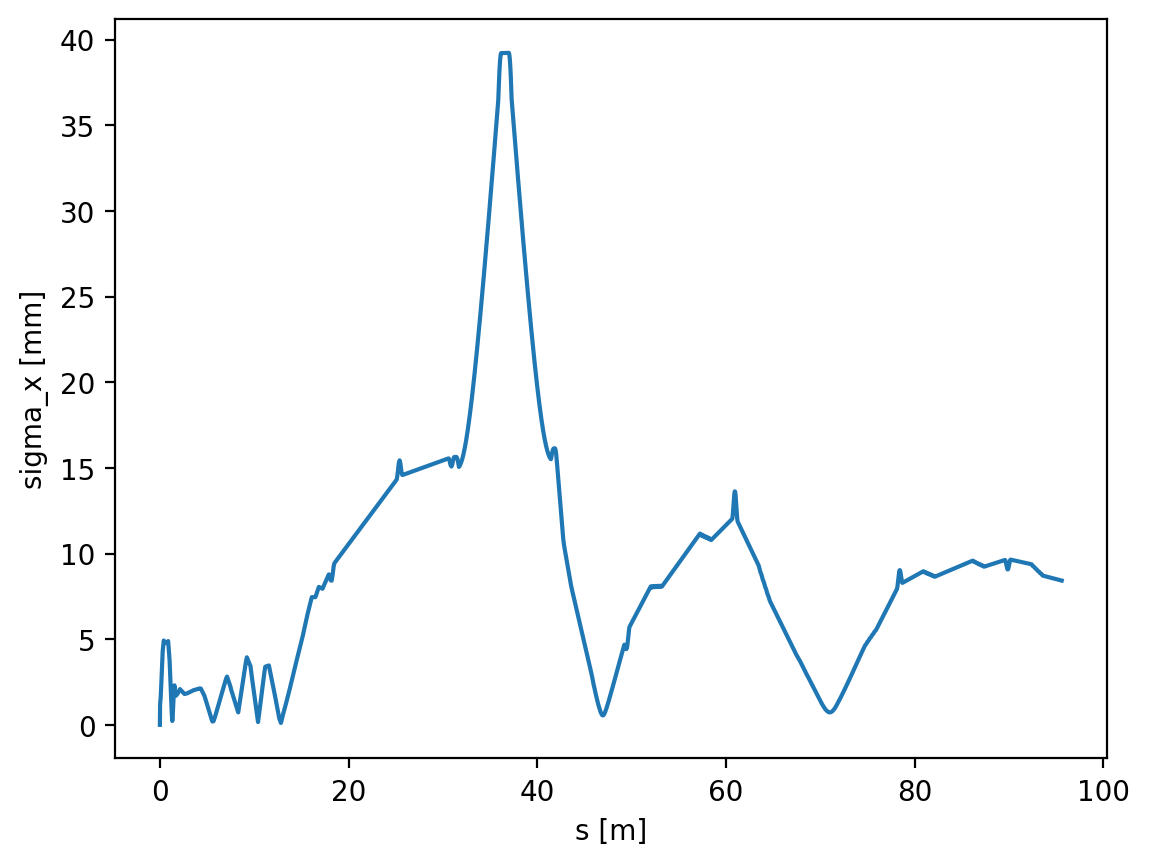

In [20]:
plt.plot(sigma['S-Pos'],np.sqrt(sigma['<x.x>'])*1e3)
plt.xlabel('s [m]')
plt.ylabel(r'sigma_x [mm]')

Text(0, 0.5, 'sigma_z [mm]')

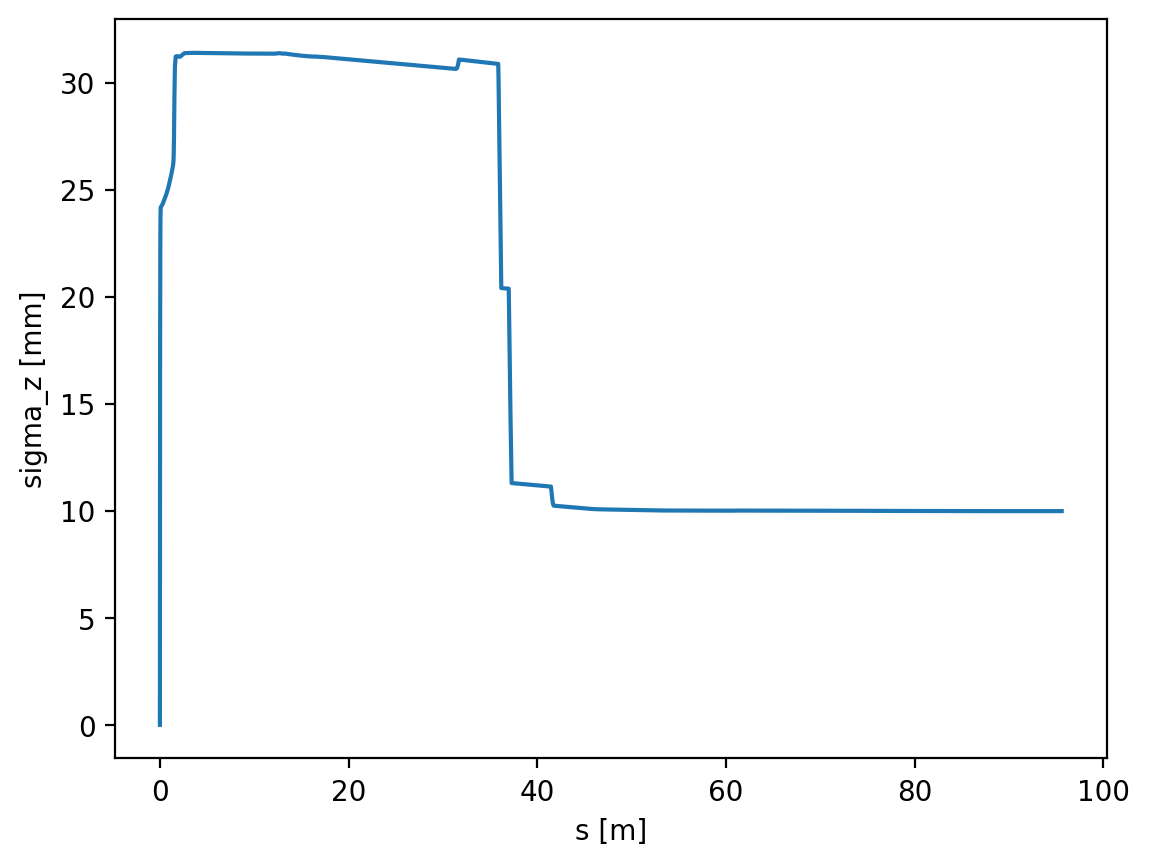

In [22]:
plt.plot(sigma['S-Pos'],np.sqrt(sigma['<z.z>'])*1e3)
plt.xlabel('s [m]')
plt.ylabel(r'sigma_z [mm]')

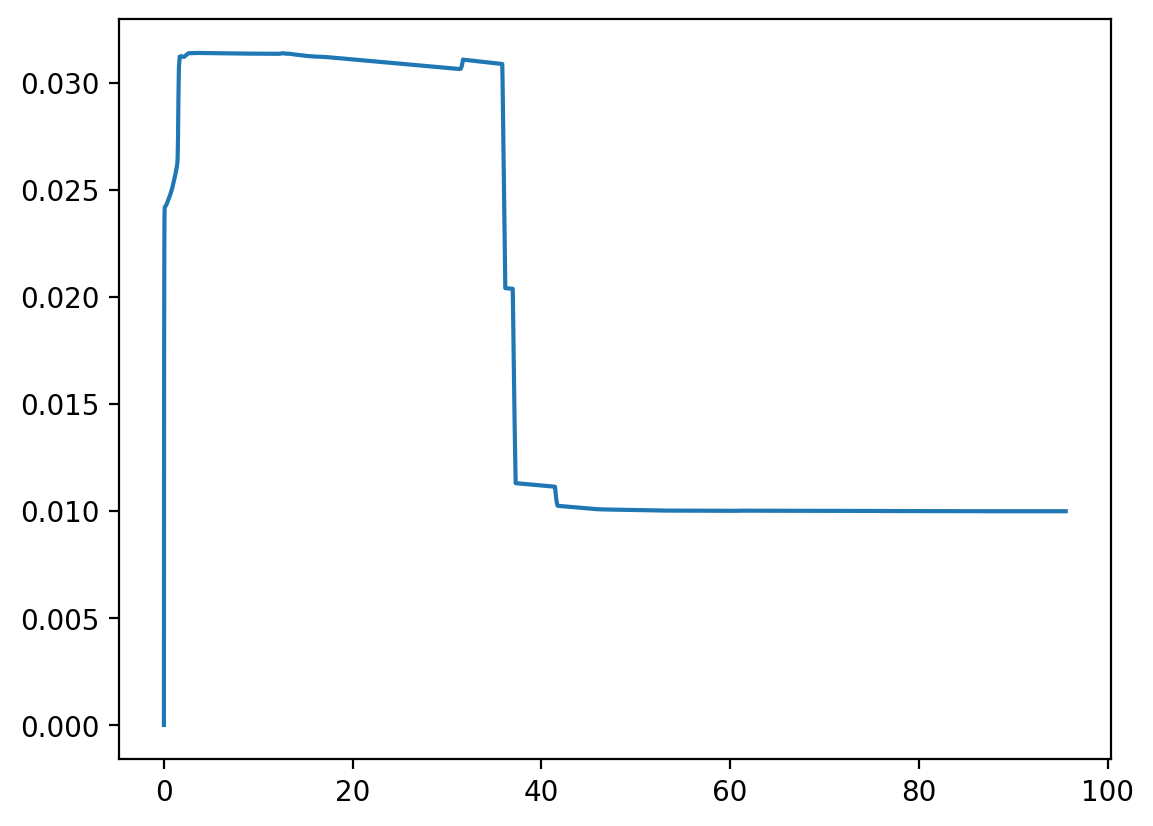

In [17]:
plt.plot(sigma['S-Pos'],np.sqrt(sigma['<z.z>']))

## particles

In [2]:
# Gather particles
plist = [ParticleGroup('initial_particles_10k.h5')]
with h5py.File('opt_inj_10k.h5', 'r') as h5:
    ppaths = particle_paths(h5)
    plist.extend([ParticleGroup(h5[g]) for g in ppaths])

In [3]:
markers = ['Cathode', 'IN.MAR.END','MG.MAR.END','PL.CM1.MAR.END','PL.CM2.MAR.END','PL.MAR.END','PX.MAR.END','LA.CRMOD1.MAR.END','LA.CRMOD2.MAR.END','LA.CRMOD3.MAR.END','LA.CRMOD4.MAR.END','LA.CRMOD5.MAR.END','LA.CRMOD6.MAR.END','LA.MARH.END','LA.CRMOD7.MAR.END','LA.CRMOD8.MAR.END','LA.CRMOD9.MAR.END','LA.CRMOD10.MAR.END','LA.MAR.END']

In [4]:
pdict = dict(zip(markers,plist))

In [8]:
pdict['PL.MAR.END']['sigma_higher_order_energy']

2509.998803889487

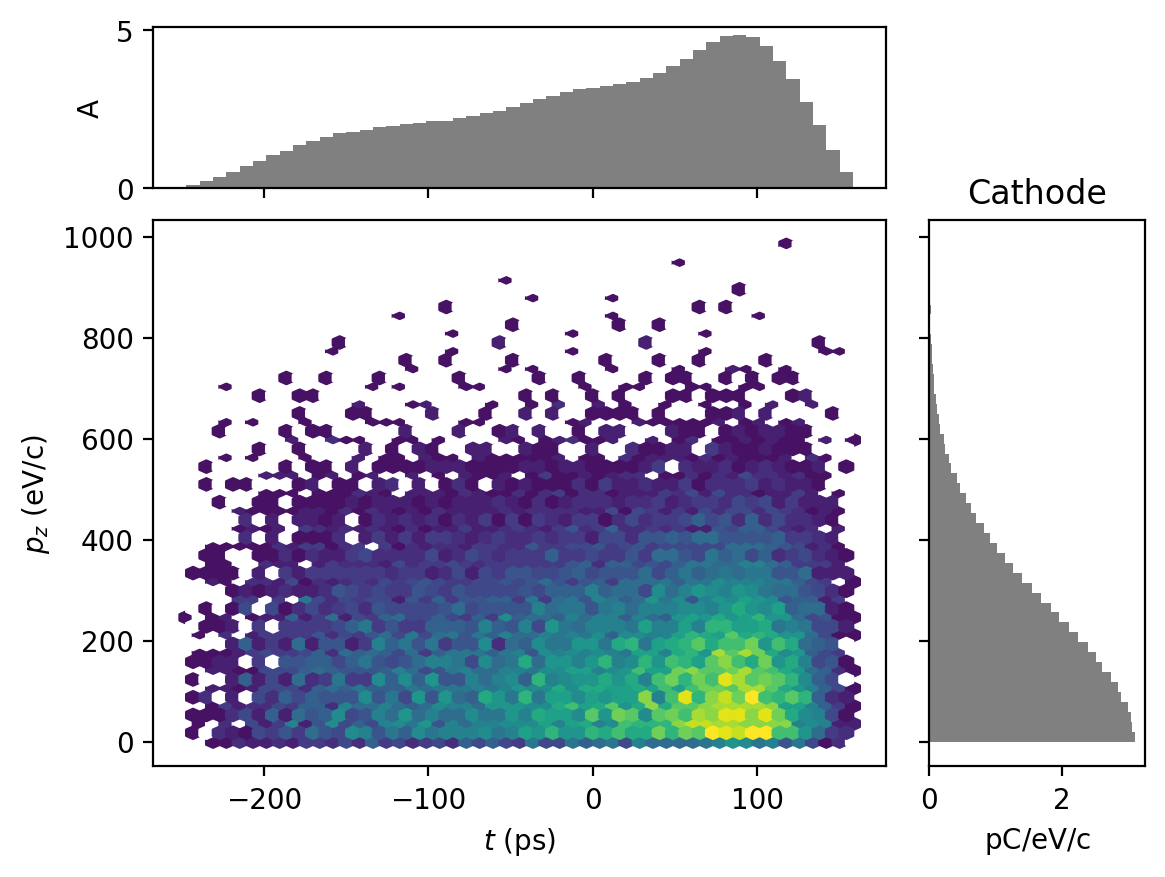

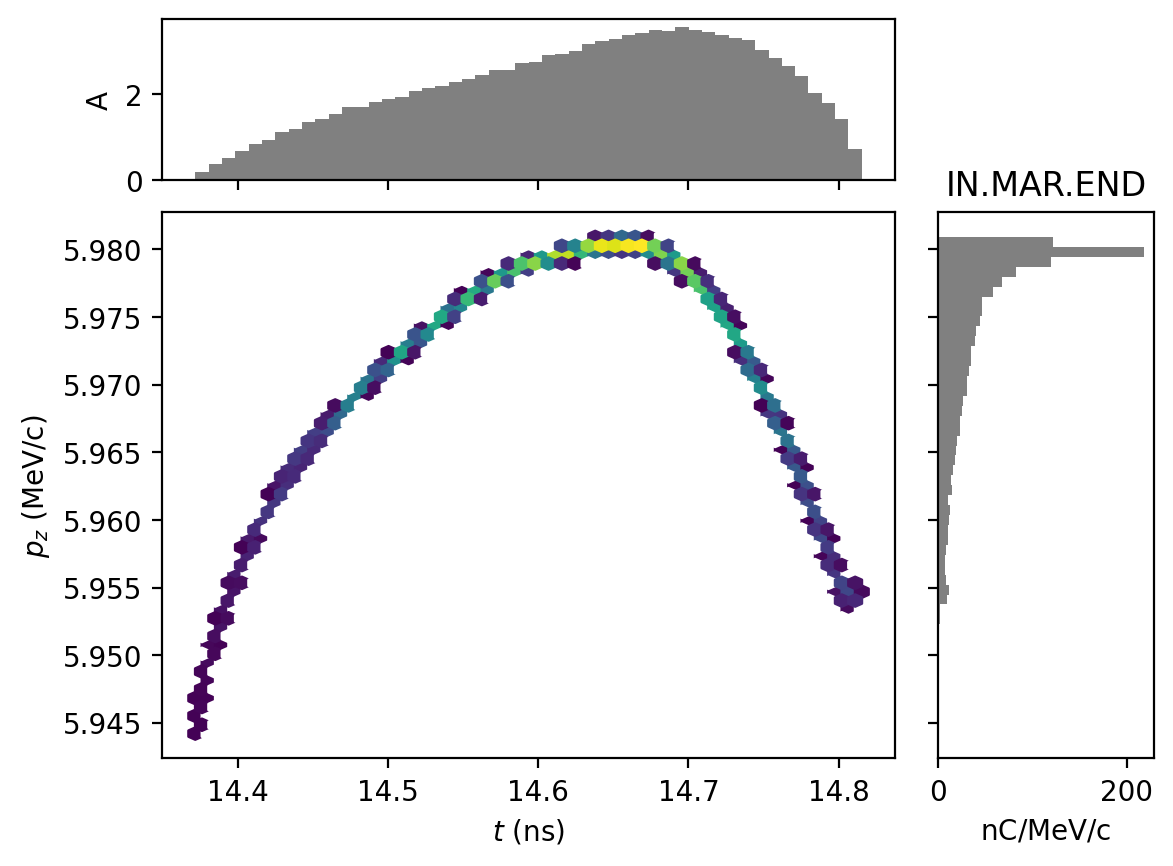

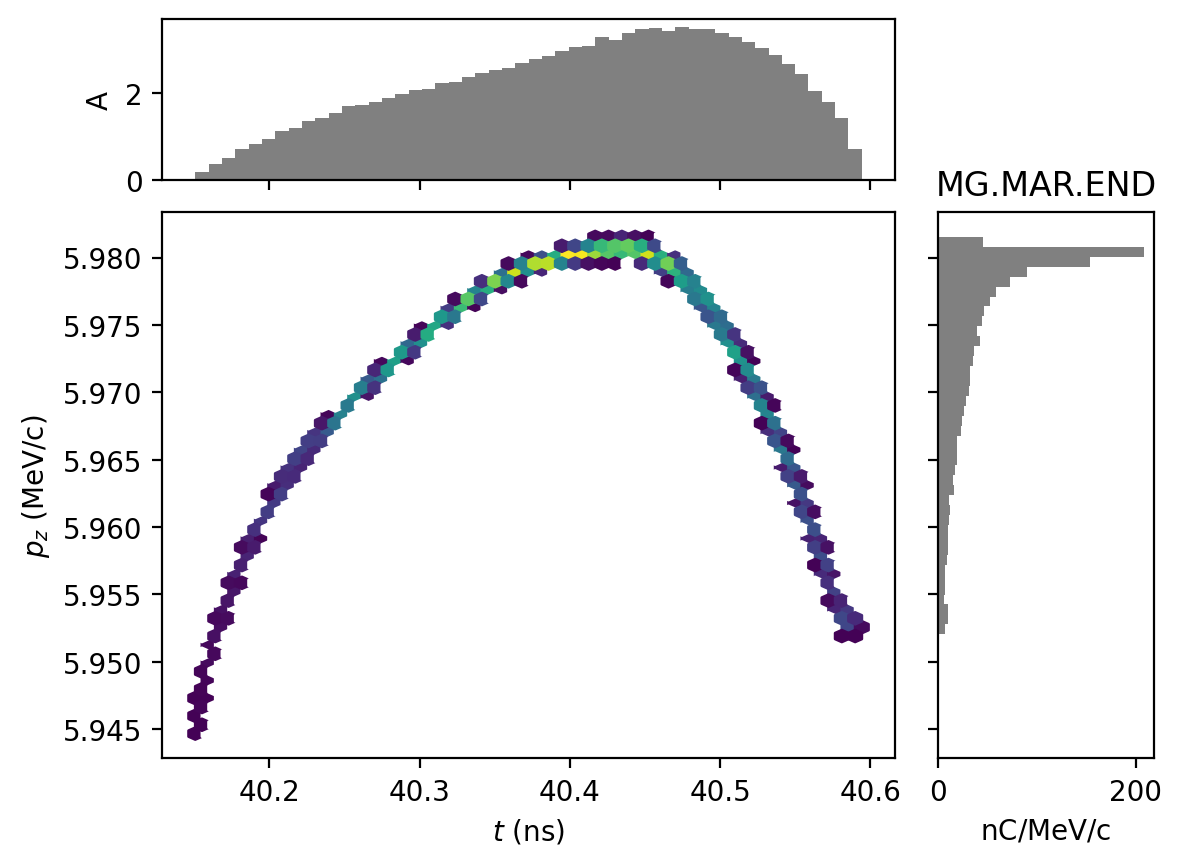

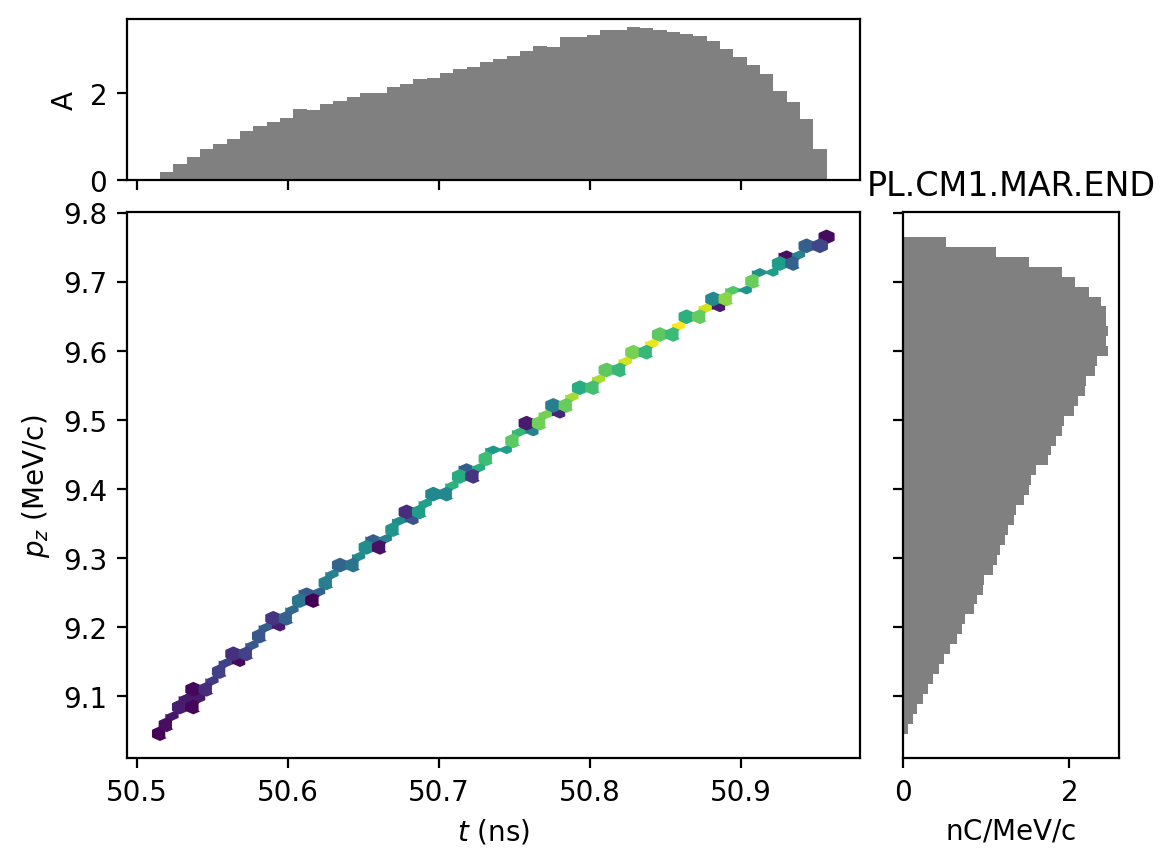

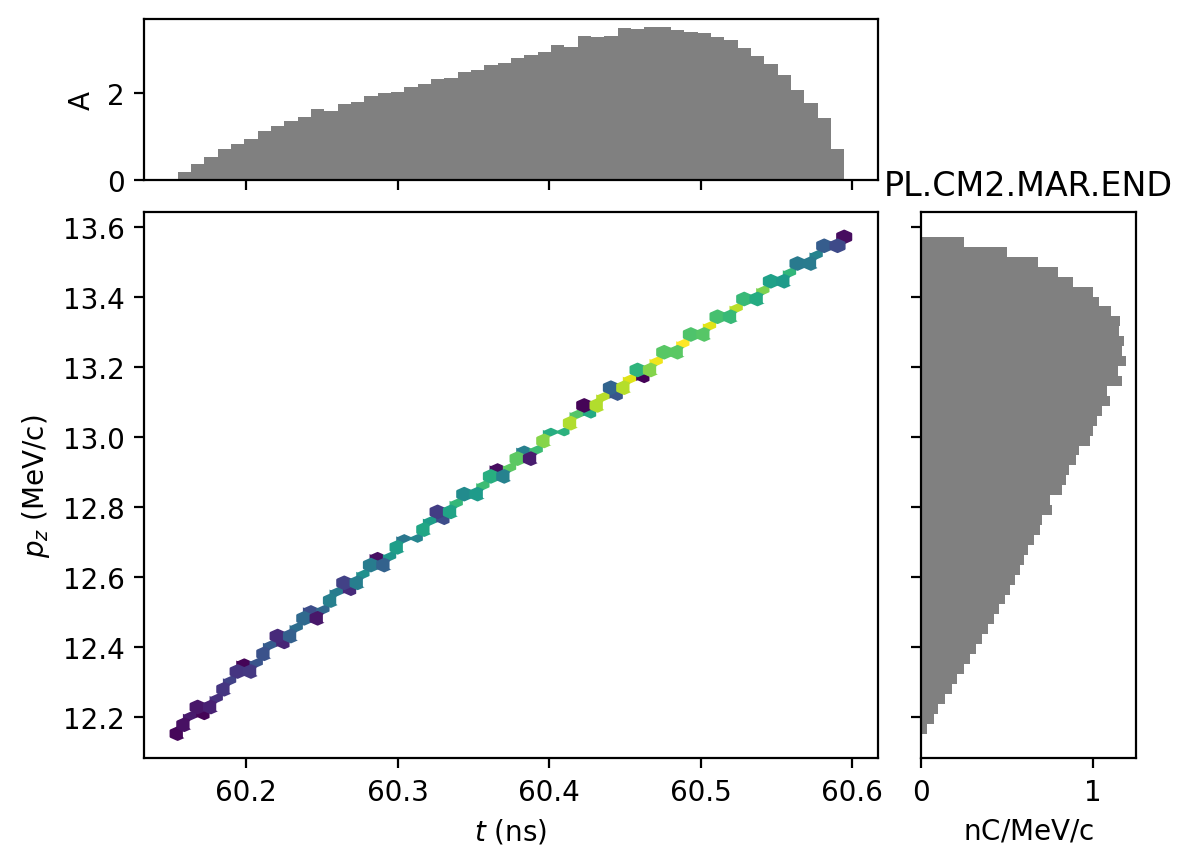

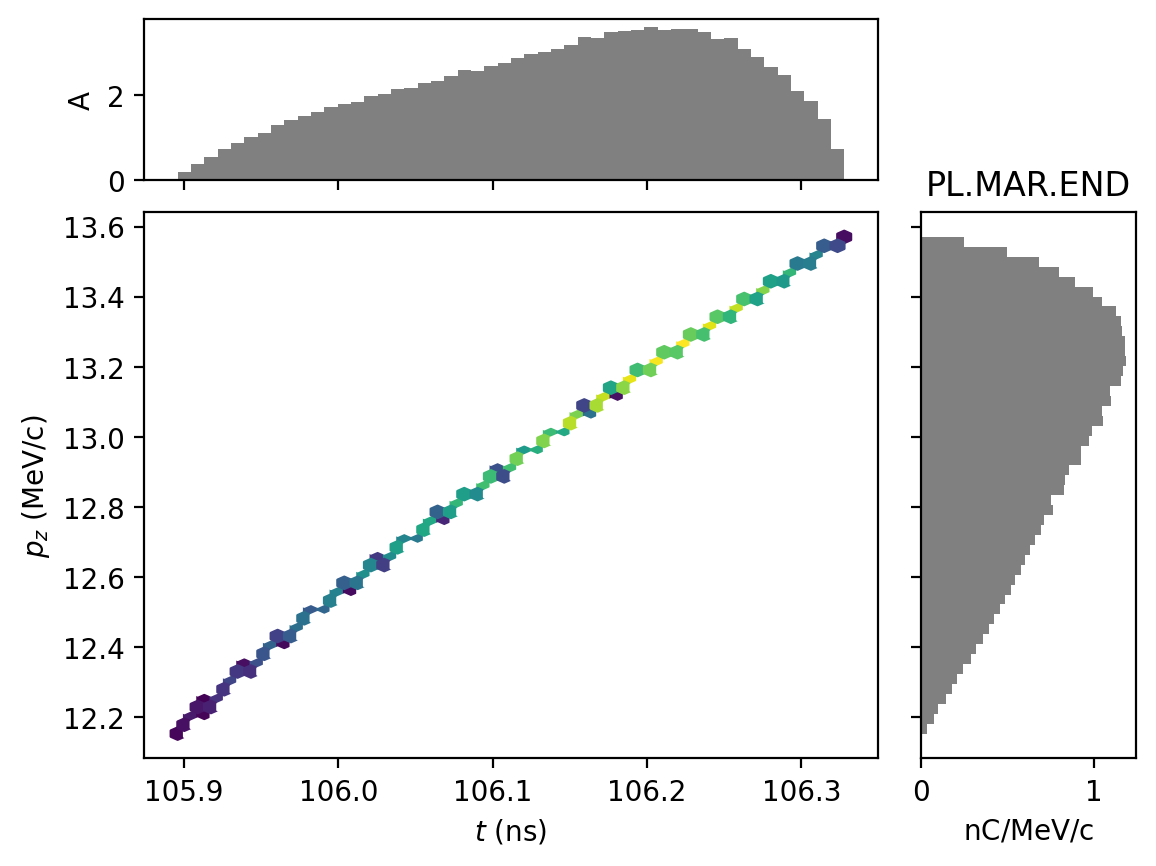

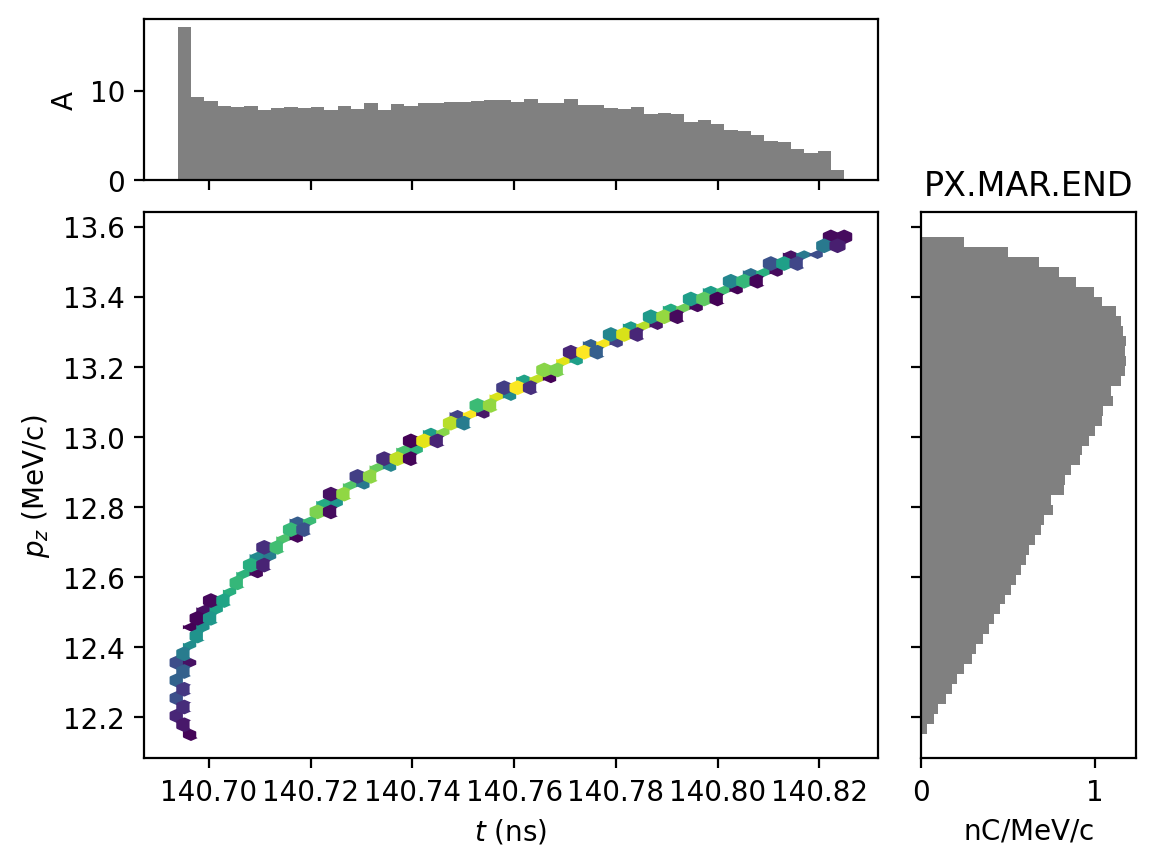

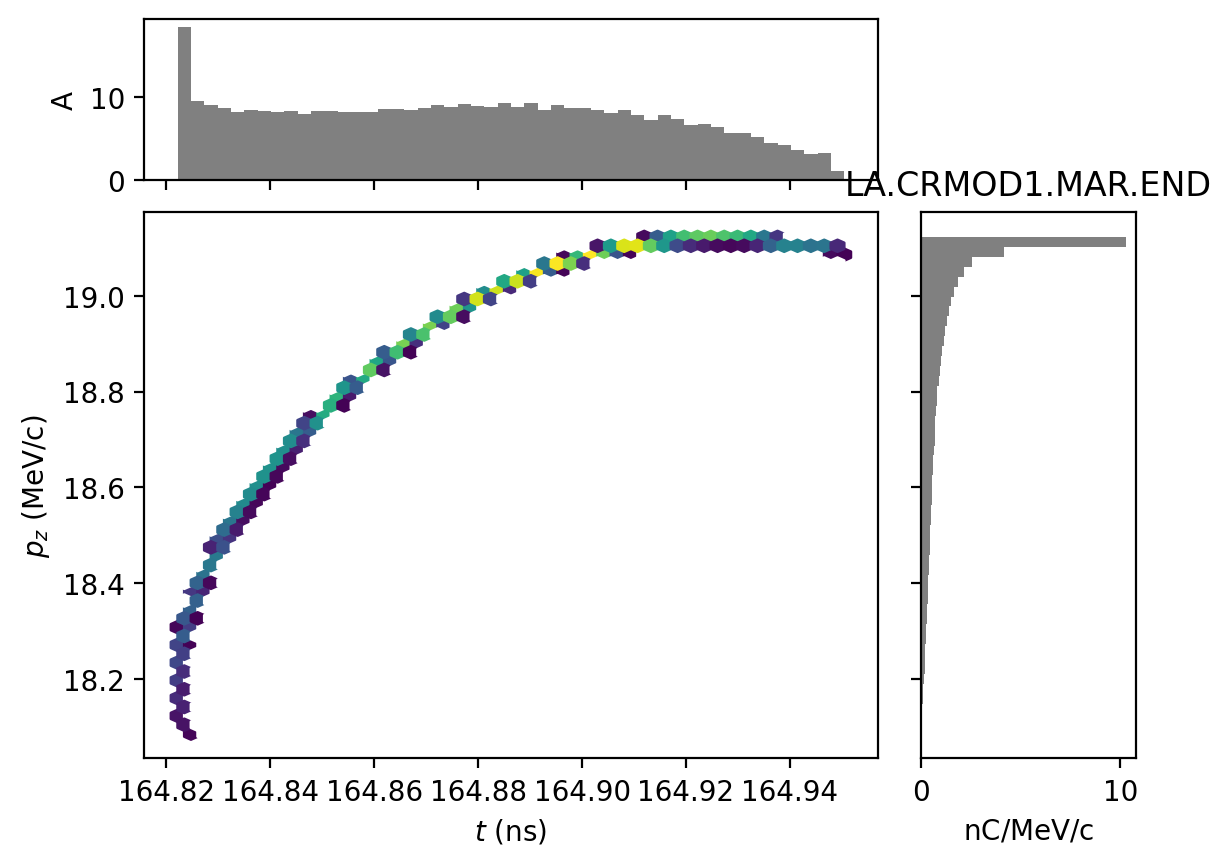

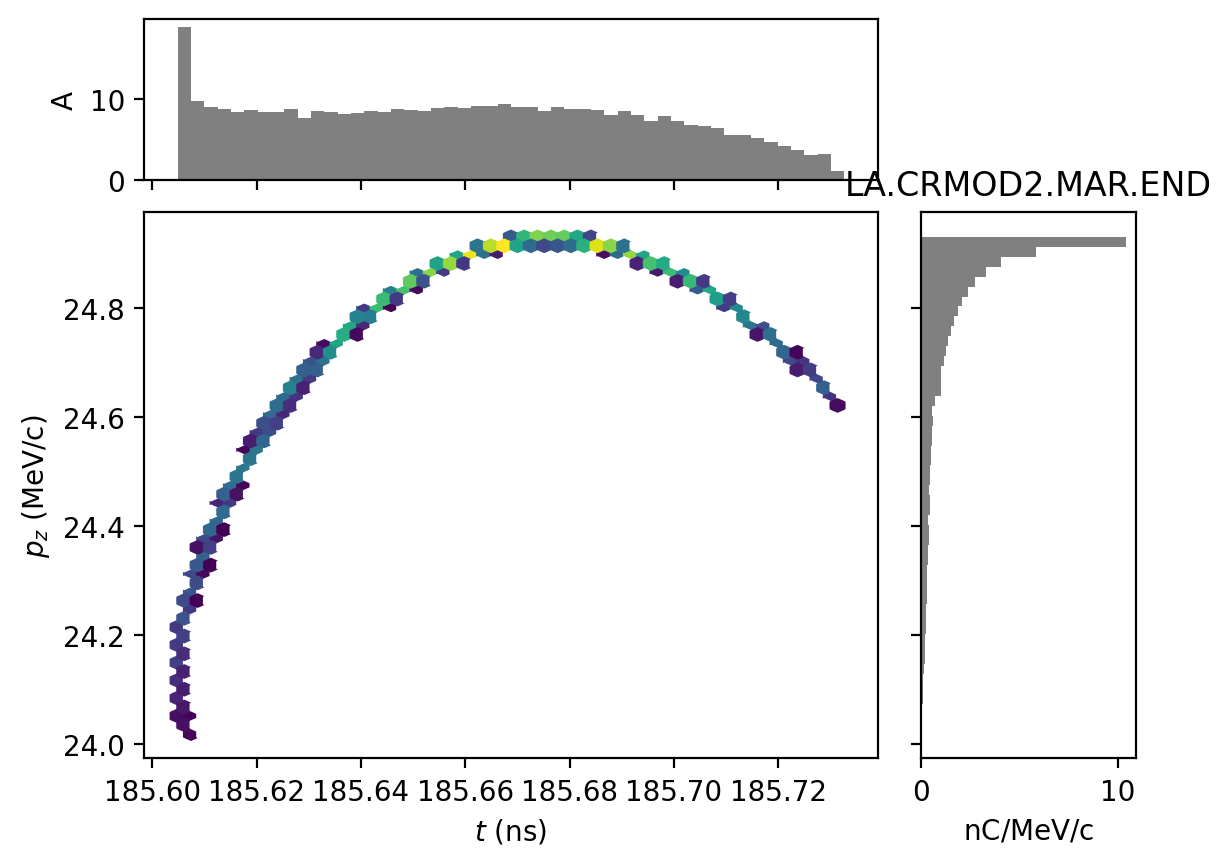

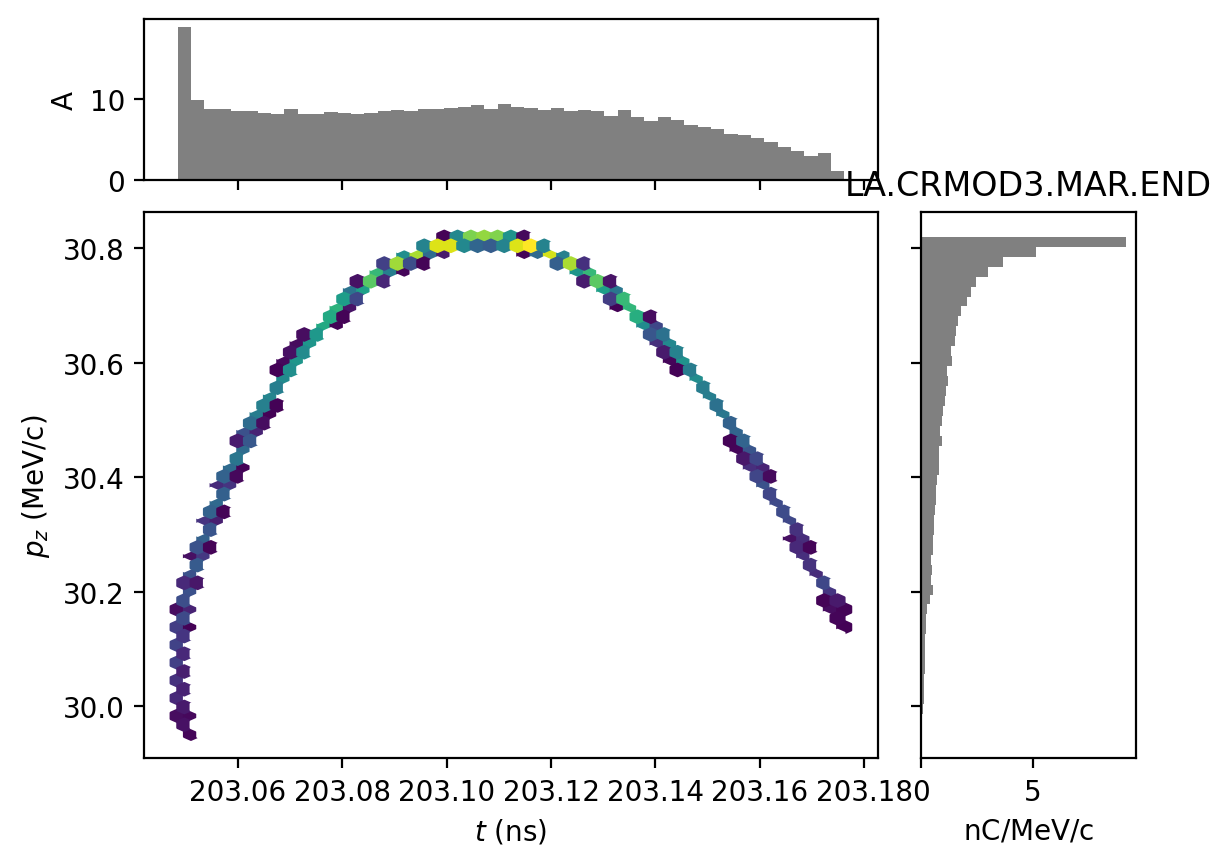

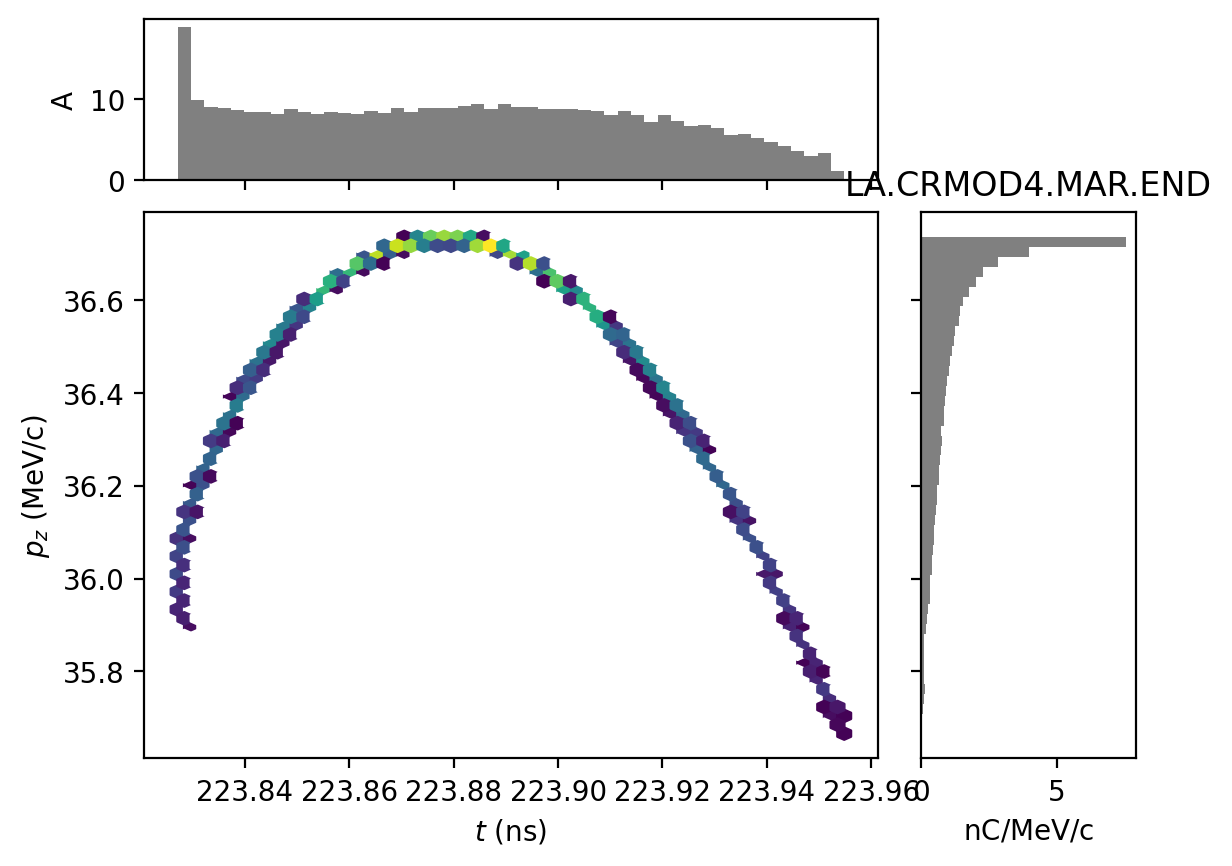

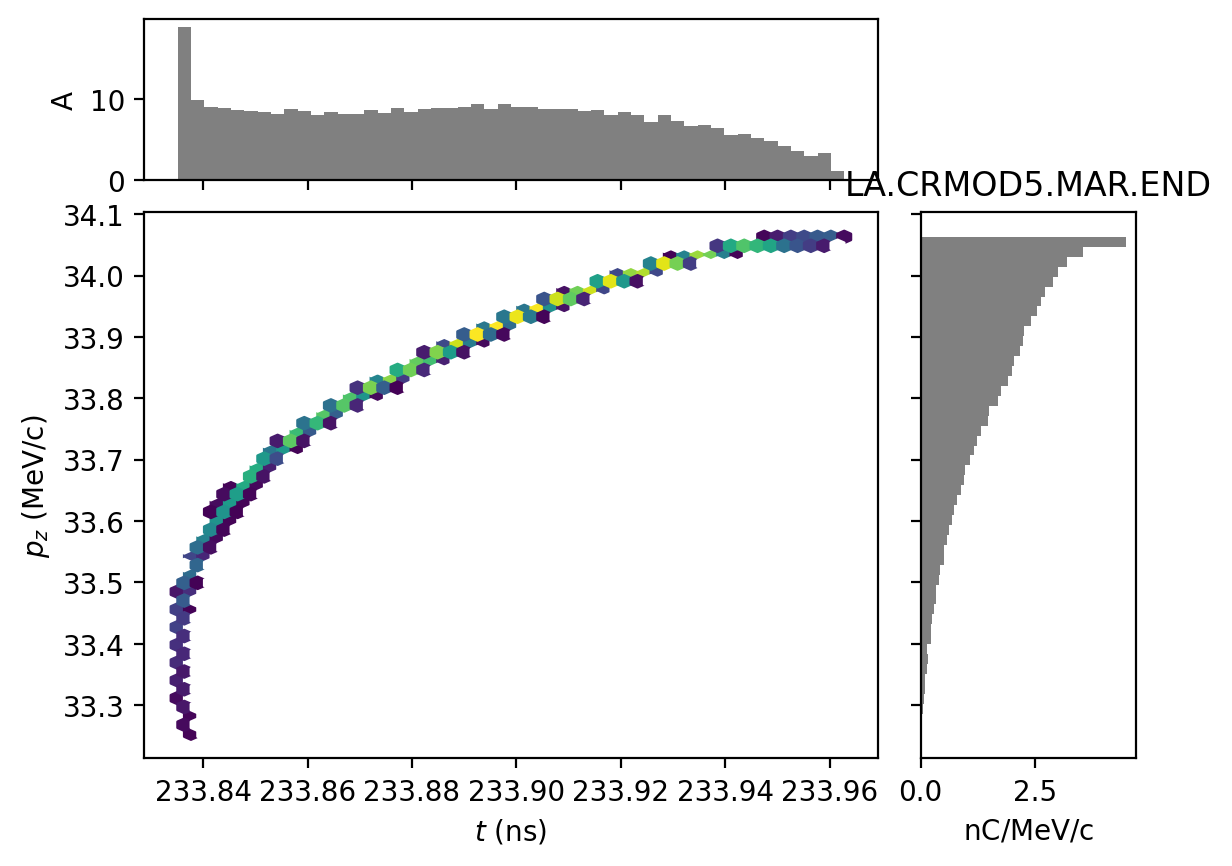

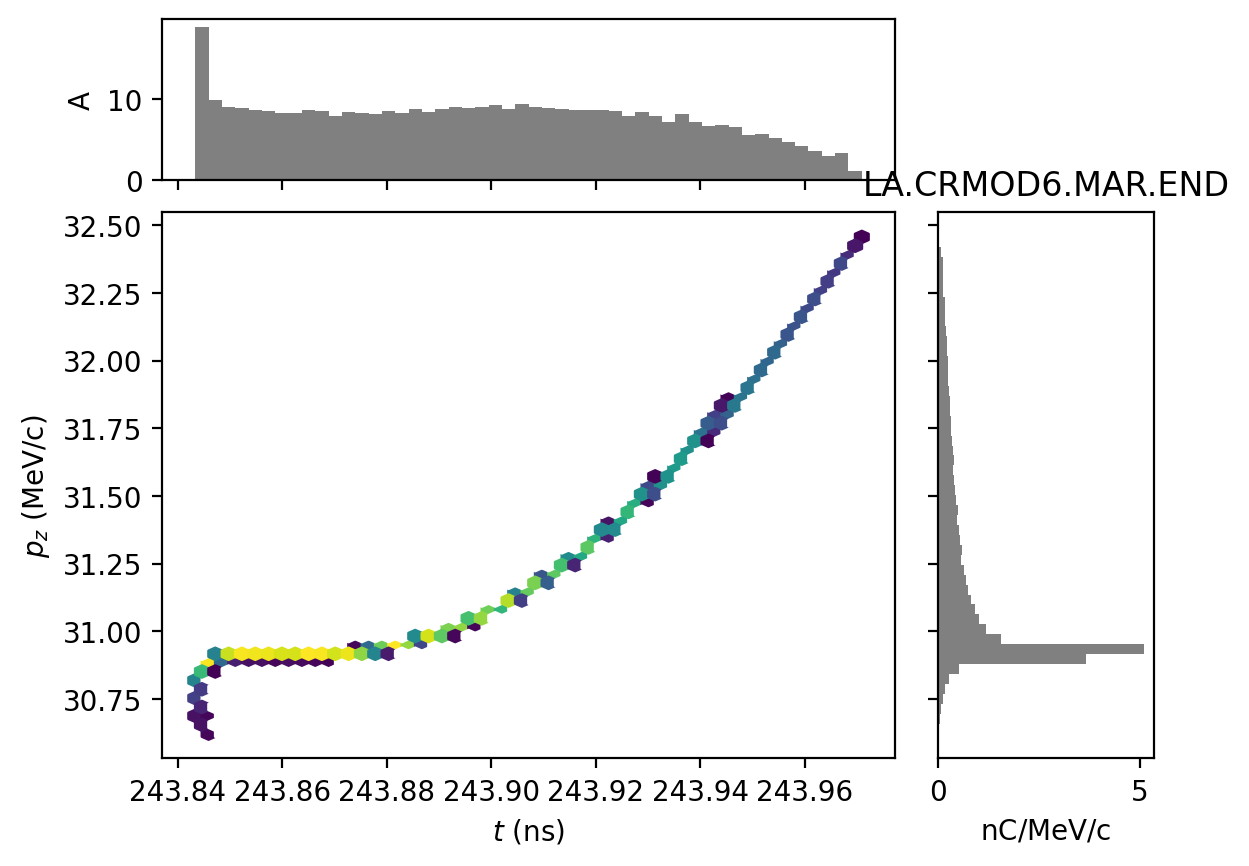

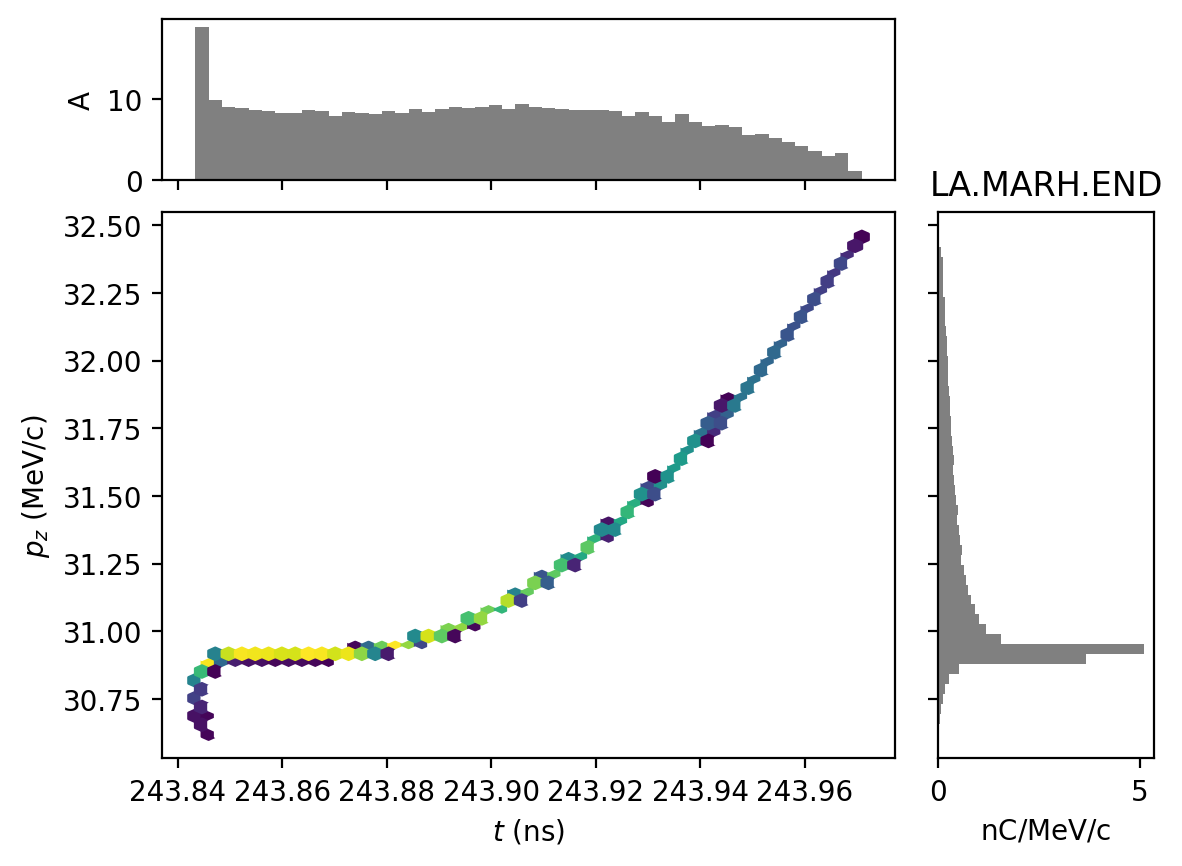

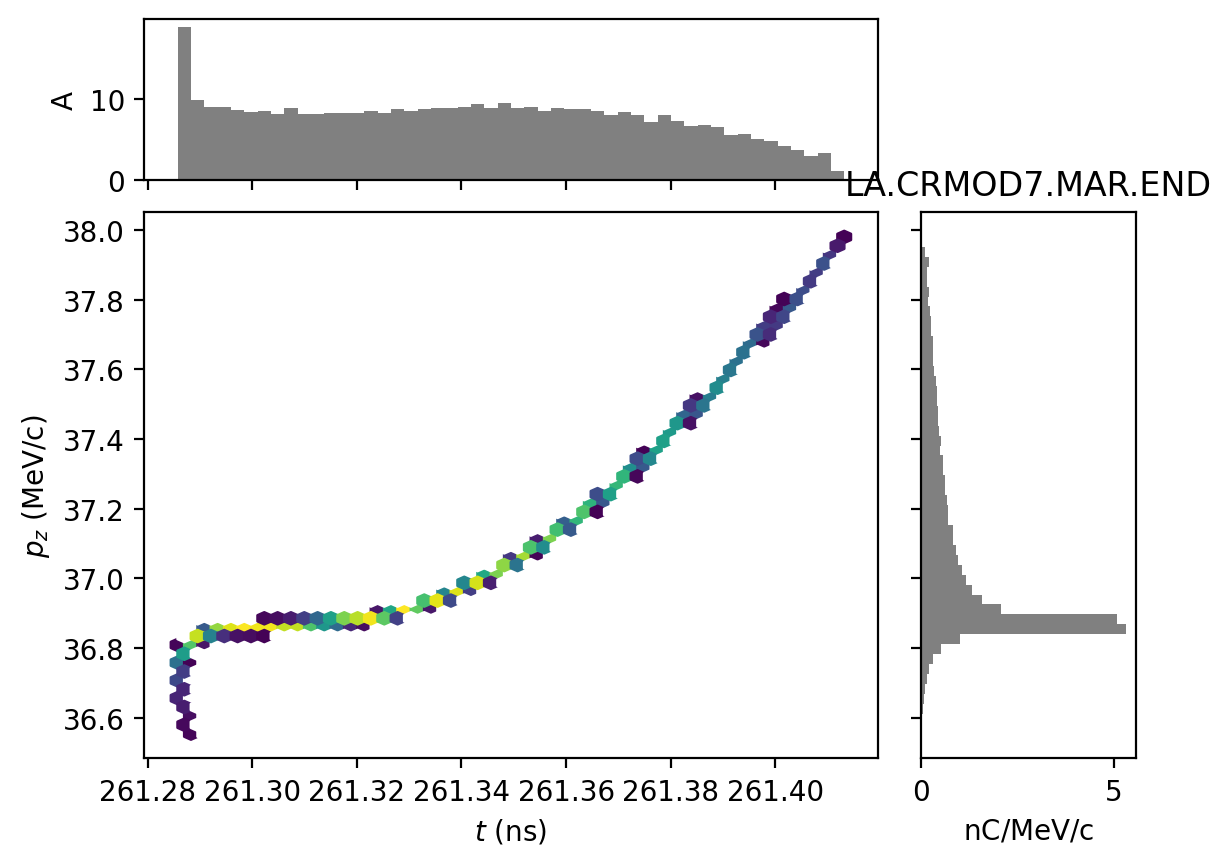

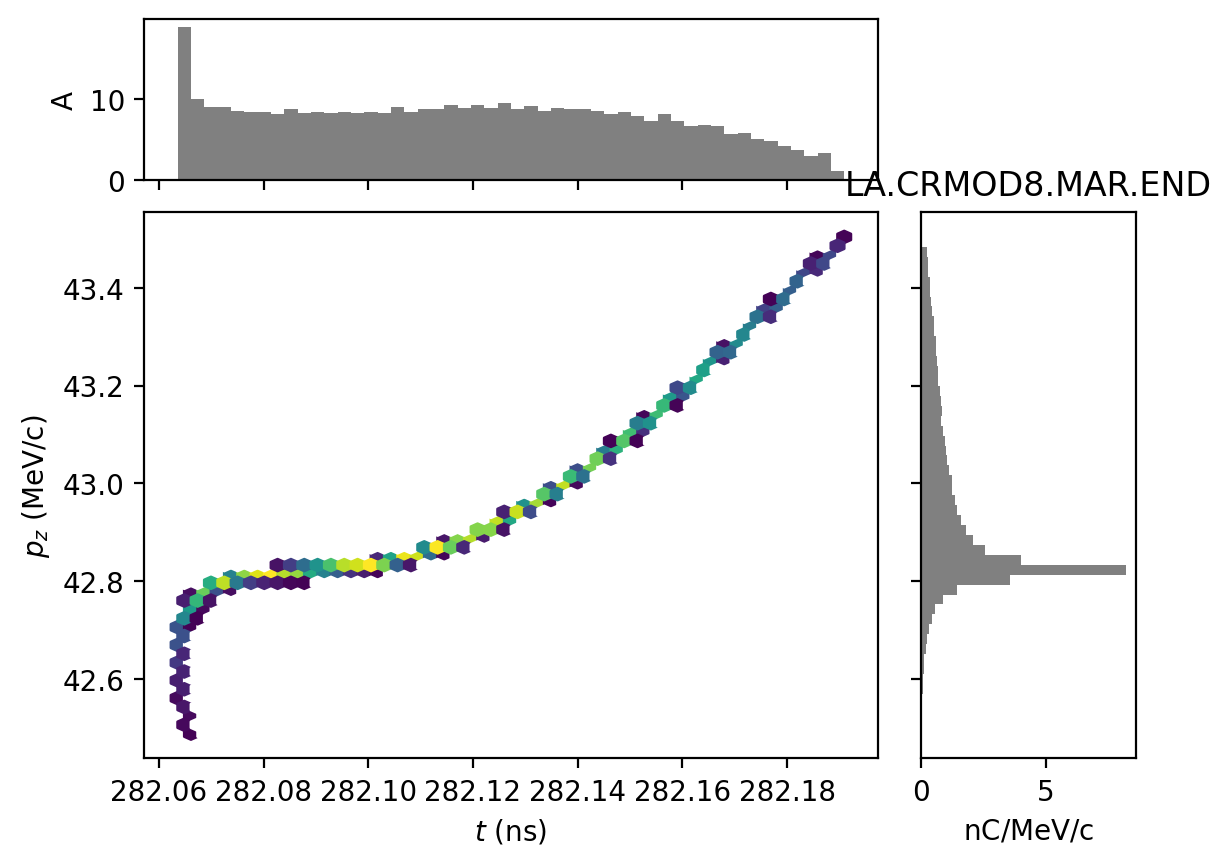

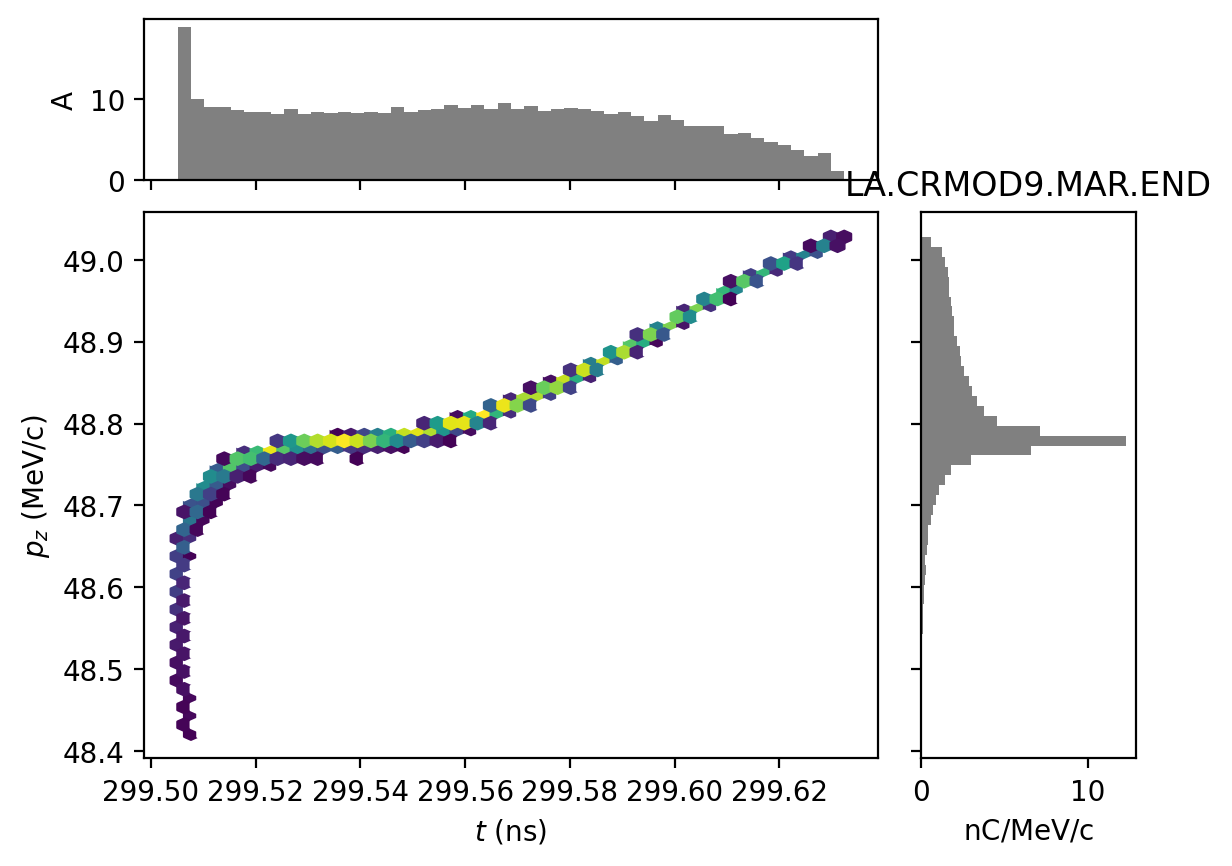

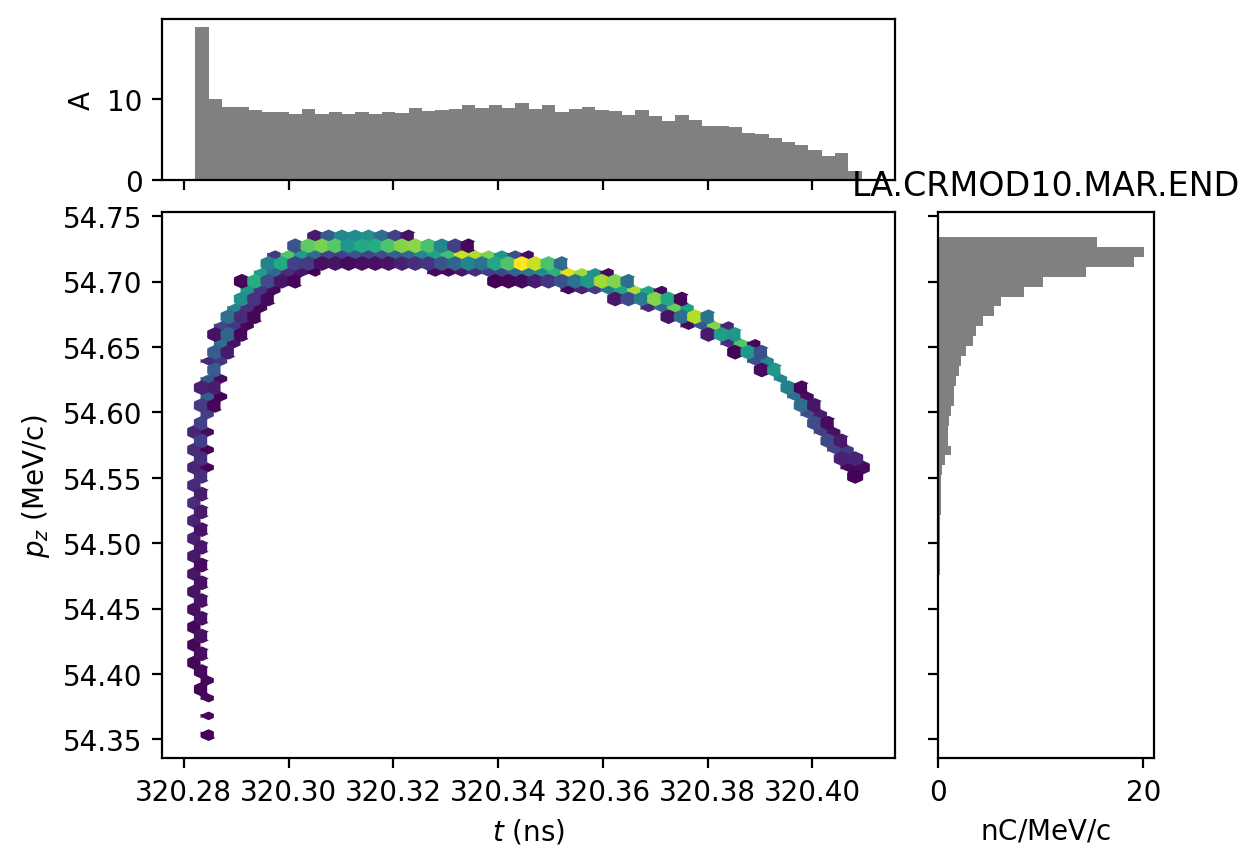

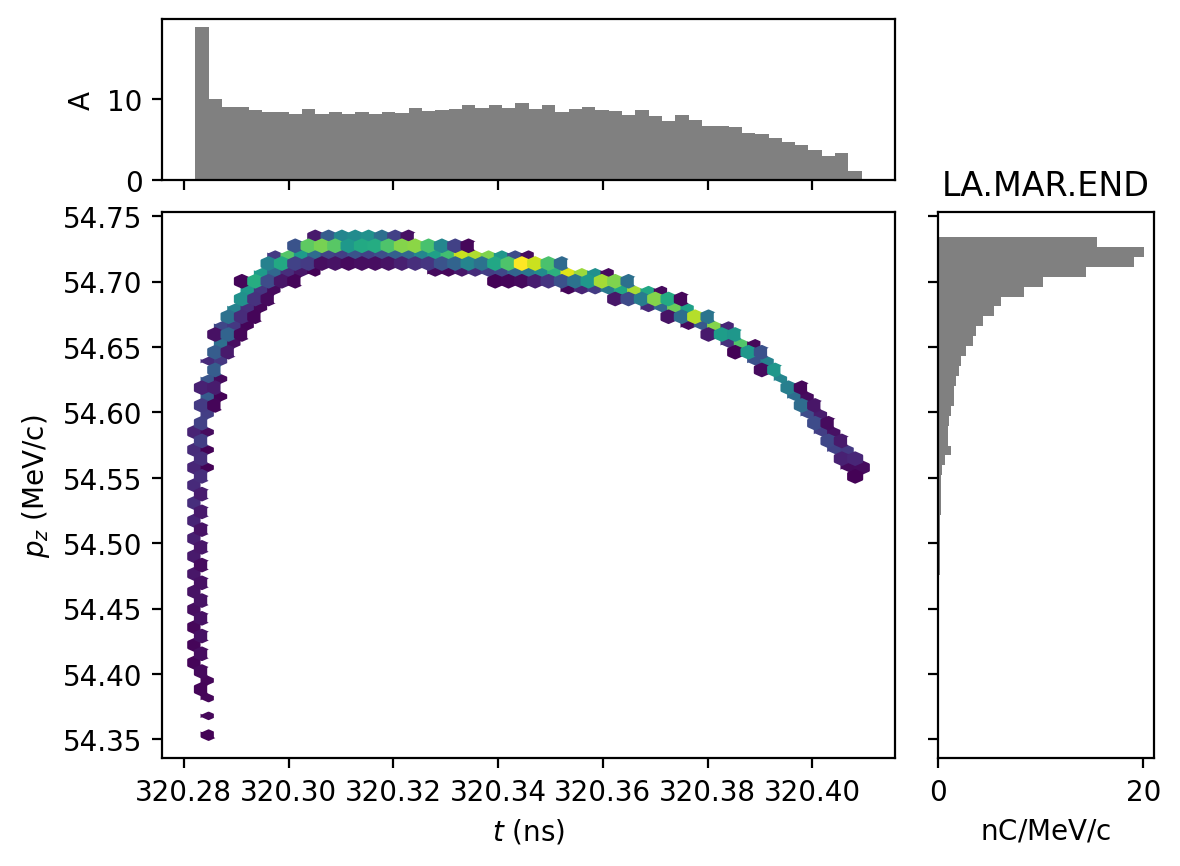

In [13]:
for p,name in zip(plist,markers):
    p.plot('t','pz')
    plt.title(name)
    #plt.savefig(f'fig/{name}.png')

In [5]:
def plot_beams(x,y):
    
    fig, axes = plt.subplots(2,3, figsize=(12,6))

    CMAP0 = copy(plt.get_cmap('viridis'))
    CMAP0.set_under('white')

    H, xedges, yedges = np.histogram2d(pdict['Cathode'][x], pdict['Cathode'][y],bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[0][0].imshow(H.T, cmap=CMAP0, vmin=1e-10, origin='lower', extent=extent, aspect='auto')

    H, xedges, yedges = np.histogram2d(pdict['IN.MAR.END'][x], pdict['IN.MAR.END'][y],bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[0][1].imshow(H.T, cmap=CMAP0, vmin=1e-10, origin='lower', extent=extent, aspect='auto')

    H, xedges, yedges = np.histogram2d(pdict['MG.MAR.END'][x], pdict['MG.MAR.END'][y],bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[0][2].imshow(H.T, cmap=CMAP0, vmin=1e-10, origin='lower', extent=extent, aspect='auto')

    H, xedges, yedges = np.histogram2d(pdict['PL.MAR.END'][x], pdict['PL.MAR.END'][y],bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[1][0].imshow(H.T, cmap=CMAP0, vmin=1e-10, origin='lower', extent=extent, aspect='auto')

    H, xedges, yedges = np.histogram2d(pdict['PX.MAR.END'][x], pdict['PX.MAR.END'][y],bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[1][1].imshow(H.T, cmap=CMAP0, vmin=1e-10, origin='lower', extent=extent, aspect='auto')

    H, xedges, yedges = np.histogram2d(pdict['LA.MAR.END'][x], pdict['LA.MAR.END'][y],bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[1][2].imshow(H.T, cmap=CMAP0, vmin=1e-10, origin='lower', extent=extent, aspect='auto')

    for row in axes:
        for ax in row:
            ax.set_xlabel(x)
            ax.set_ylabel(y)
    axes[0][0].set_title('Cathode')
    axes[0][1].set_title('IN.MAR.END')
    axes[0][2].set_title('MG.MAR.END')
    axes[1][0].set_title('PL.MAR.END')
    axes[1][1].set_title('PX.MAR.END')
    axes[1][2].set_title('LA.MAR.END')
    fig.tight_layout()
    return fig, axes

In [6]:
def plot_beams(x,y):
    
    fig, axes = plt.subplots(2,5, figsize=(20,6))

    CMAP0 = copy(plt.get_cmap('viridis'))
    CMAP0.set_under('white')

    H, xedges, yedges = np.histogram2d(PLA[0][x], PLA[0][y],bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[0][0].imshow(H.T, cmap=CMAP0, vmin=1e-10, origin='lower', extent=extent, aspect='auto')

    H, xedges, yedges = np.histogram2d(PLA[1][x], PLA[1][y],bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[0][1].imshow(H.T, cmap=CMAP0, vmin=1e-10, origin='lower', extent=extent, aspect='auto')

    H, xedges, yedges = np.histogram2d(PLA[2][x], PLA[2][y],bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[0][2].imshow(H.T, cmap=CMAP0, vmin=1e-10, origin='lower', extent=extent, aspect='auto')

    H, xedges, yedges = np.histogram2d(PLA[3][x], PLA[3][y],bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[0][3].imshow(H.T, cmap=CMAP0, vmin=1e-10, origin='lower', extent=extent, aspect='auto')

    H, xedges, yedges = np.histogram2d(PLA[4][x], PLA[4][y],bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[0][4].imshow(H.T, cmap=CMAP0, vmin=1e-10, origin='lower', extent=extent, aspect='auto')

    H, xedges, yedges = np.histogram2d(PLA[5][x], PLA[5][y],bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[1][0].imshow(H.T, cmap=CMAP0, vmin=1e-10, origin='lower', extent=extent, aspect='auto')

    H, xedges, yedges = np.histogram2d(PLA[6][x], PLA[6][y],bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[1][1].imshow(H.T, cmap=CMAP0, vmin=1e-10, origin='lower', extent=extent, aspect='auto')
    
    H, xedges, yedges = np.histogram2d(PLA[7][x], PLA[7][y],bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[1][2].imshow(H.T, cmap=CMAP0, vmin=1e-10, origin='lower', extent=extent, aspect='auto')
    
    H, xedges, yedges = np.histogram2d(PLA[8][x], PLA[8][y],bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[1][3].imshow(H.T, cmap=CMAP0, vmin=1e-10, origin='lower', extent=extent, aspect='auto')
    
    H, xedges, yedges = np.histogram2d(PLA[9][x], PLA[9][y],bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[1][4].imshow(H.T, cmap=CMAP0, vmin=1e-10, origin='lower', extent=extent, aspect='auto')
    
    for row in axes:
        for ax in row:
            ax.set_xlabel(x)
            ax.set_ylabel(y)
    axes[0][0].set_title('CRMOD1')
    axes[0][1].set_title('CRMOD2')
    axes[0][2].set_title('CRMOD3')
    axes[0][3].set_title('CRMOD4')
    axes[0][4].set_title('CRMOD5')
    axes[1][0].set_title('CRMOD6')
    axes[1][1].set_title('CRMOD7')
    axes[1][2].set_title('CRMOD8')
    axes[1][3].set_title('CRMOD9')
    axes[1][4].set_title('CRMOD10')

    fig.tight_layout()
    return fig, axes

(<Figure size 1200x600 with 6 Axes>,
 array([[<Axes: title={'center': 'Cathode'}, xlabel='t', ylabel='higher_order_energy'>,
         <Axes: title={'center': 'IN.MAR.END'}, xlabel='t', ylabel='higher_order_energy'>,
         <Axes: title={'center': 'MG.MAR.END'}, xlabel='t', ylabel='higher_order_energy'>],
        [<Axes: title={'center': 'PL.MAR.END'}, xlabel='t', ylabel='higher_order_energy'>,
         <Axes: title={'center': 'PX.MAR.END'}, xlabel='t', ylabel='higher_order_energy'>,
         <Axes: title={'center': 'LA.MAR.END'}, xlabel='t', ylabel='higher_order_energy'>]],
       dtype=object))

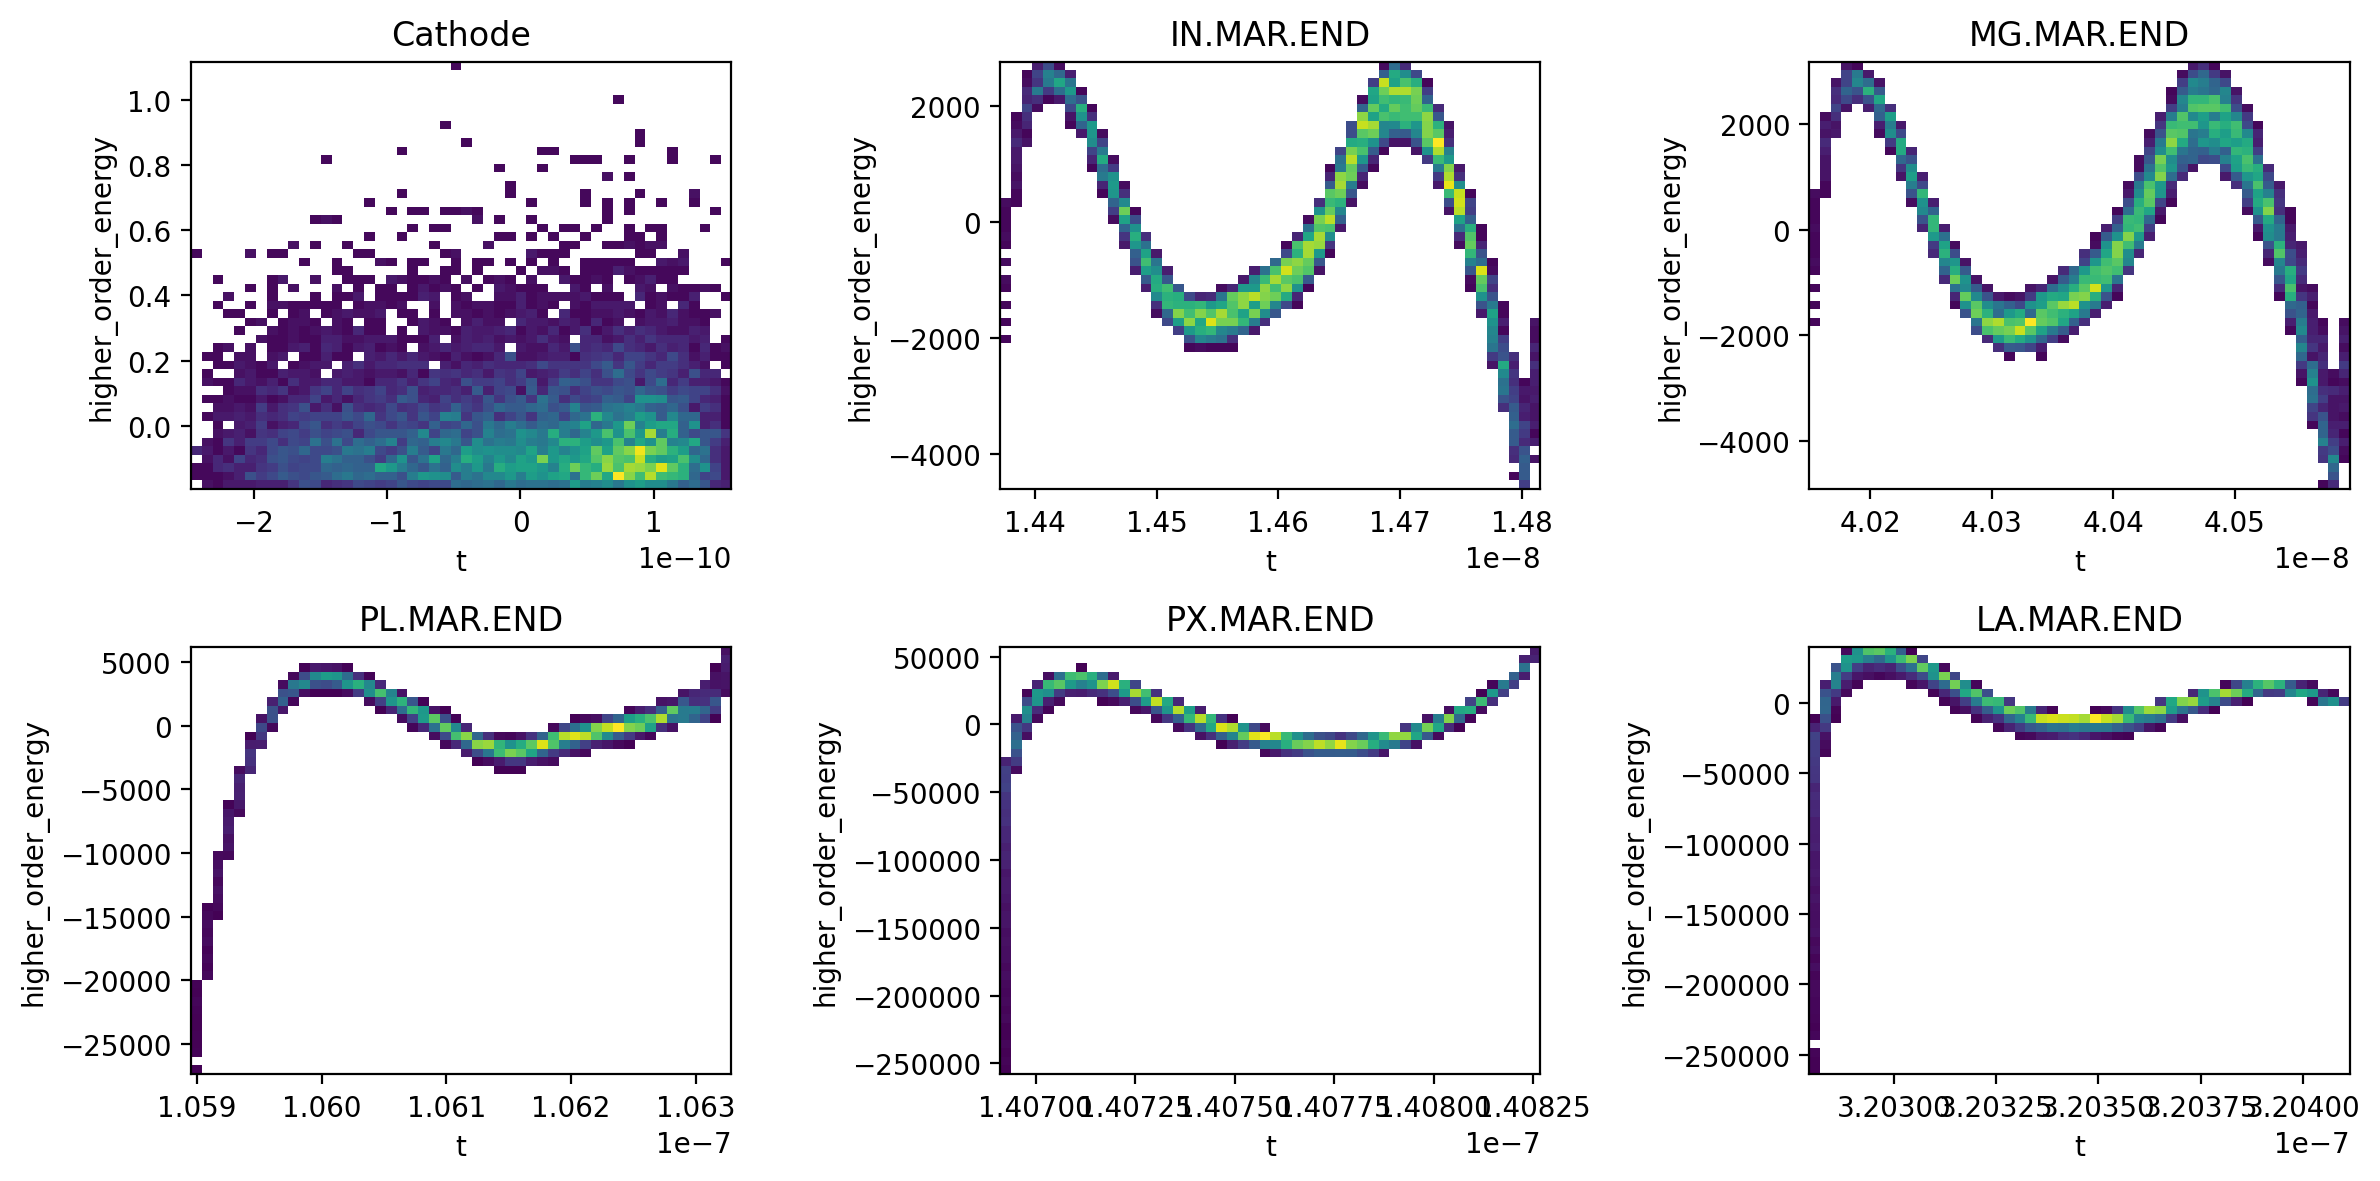

In [6]:
plot_beams('t','higher_order_energy')

(<Figure size 1200x600 with 6 Axes>,
 array([[<Axes: title={'center': 'Cathode'}, xlabel='x', ylabel='y'>,
         <Axes: title={'center': 'IN.MAR.END'}, xlabel='x', ylabel='y'>,
         <Axes: title={'center': 'MG.MAR.END'}, xlabel='x', ylabel='y'>],
        [<Axes: title={'center': 'PL.MAR.END'}, xlabel='x', ylabel='y'>,
         <Axes: title={'center': 'PX.MAR.END'}, xlabel='x', ylabel='y'>,
         <Axes: title={'center': 'LA.MAR.END'}, xlabel='x', ylabel='y'>]],
       dtype=object))

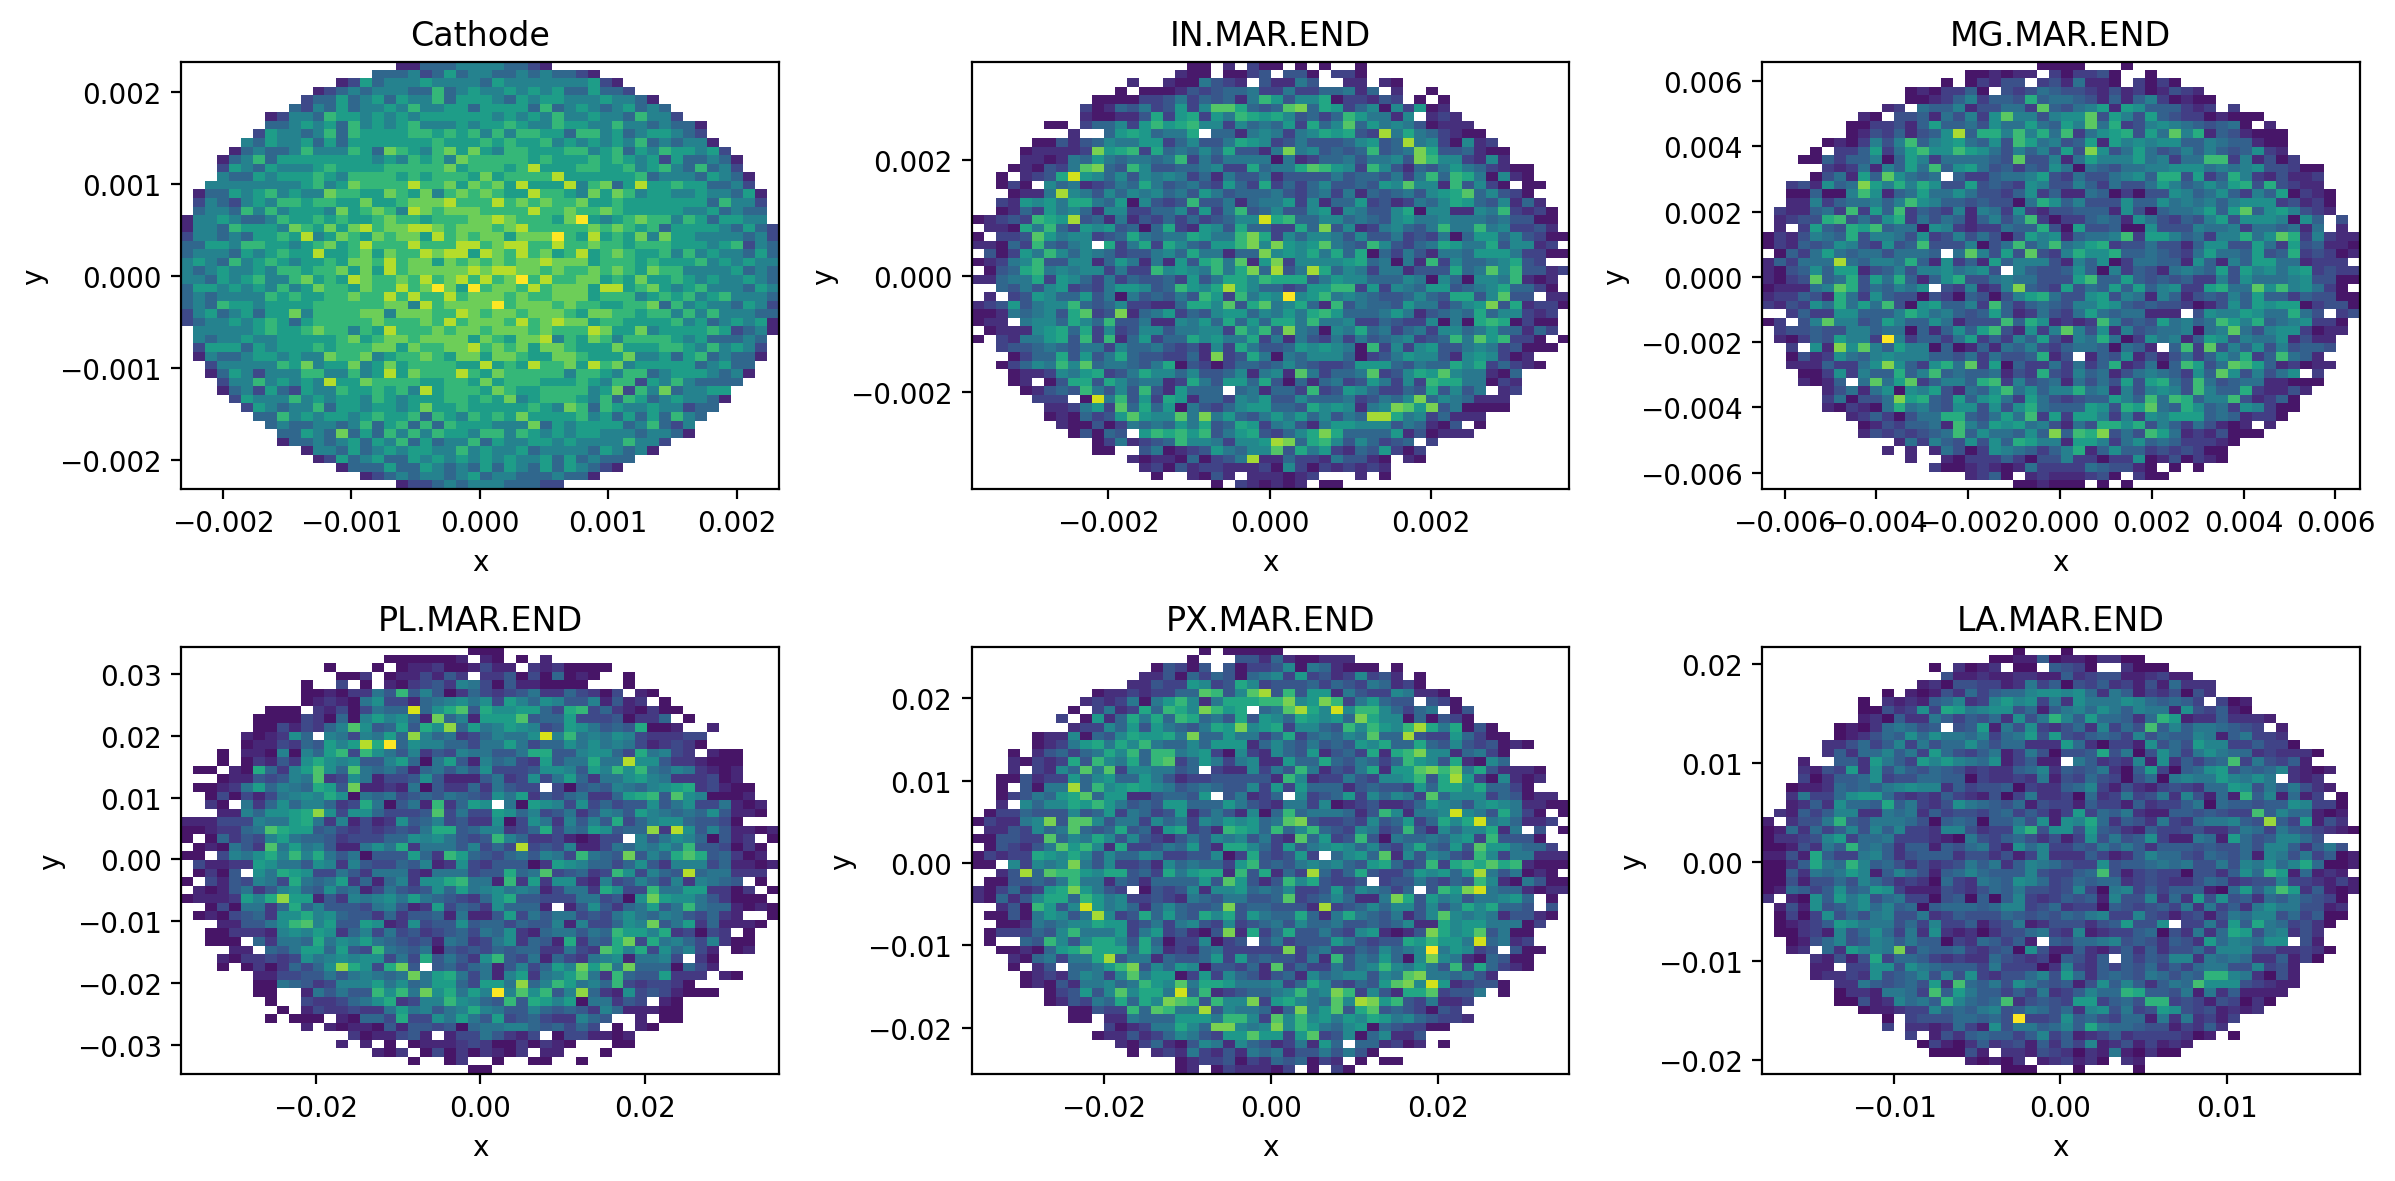

In [5]:
plot_beams('x','y')

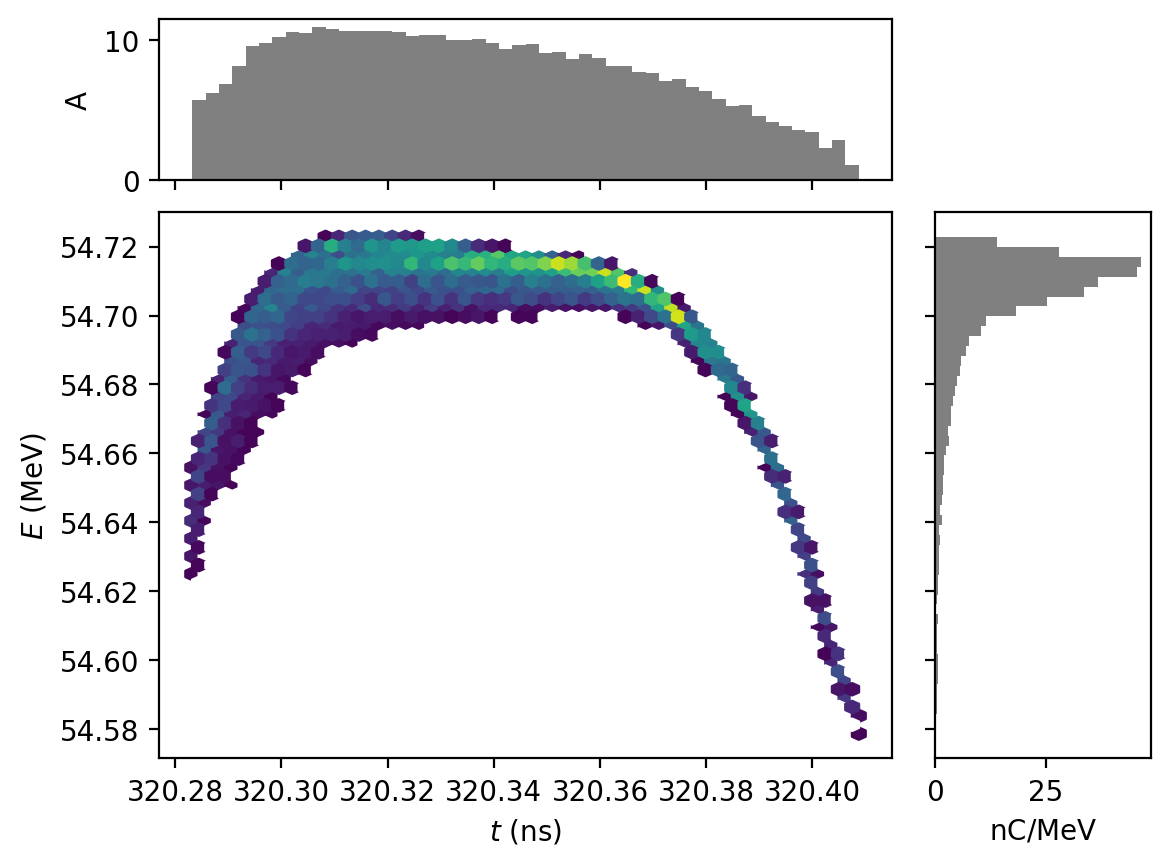

In [6]:
P6.plot('t','energy')

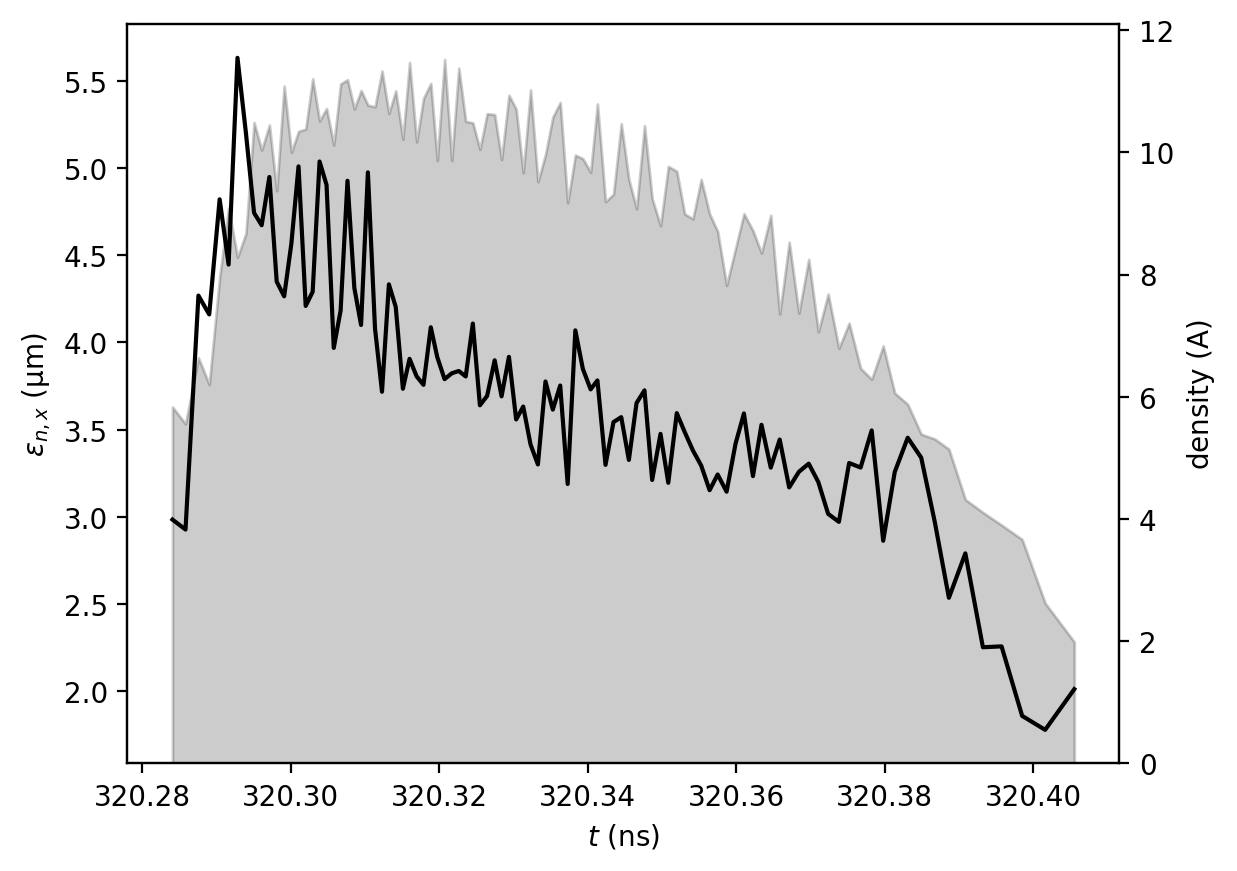

In [10]:
P6.slice_plot('norm_emit_x')

In [60]:
P6['sigma_t']

3.152890387124916e-11

In [46]:
P6.drift_to_t(P6['mean_t'])

In [54]:
P6.drift_to_z(P6['mean_z'])

In [55]:
stat = P6.slice_statistics('sigma_pz', 'norm_emit_x',n_slice=100)

plt.scatter(stat['mean_z'], stat['sigma_pz'])
plt.axvline(-P6['sigma_z']-7e-3)
plt.axvline(P6['sigma_z']-7e-3)

KeyError: 'mean_z'

(0.0, 1e-05)

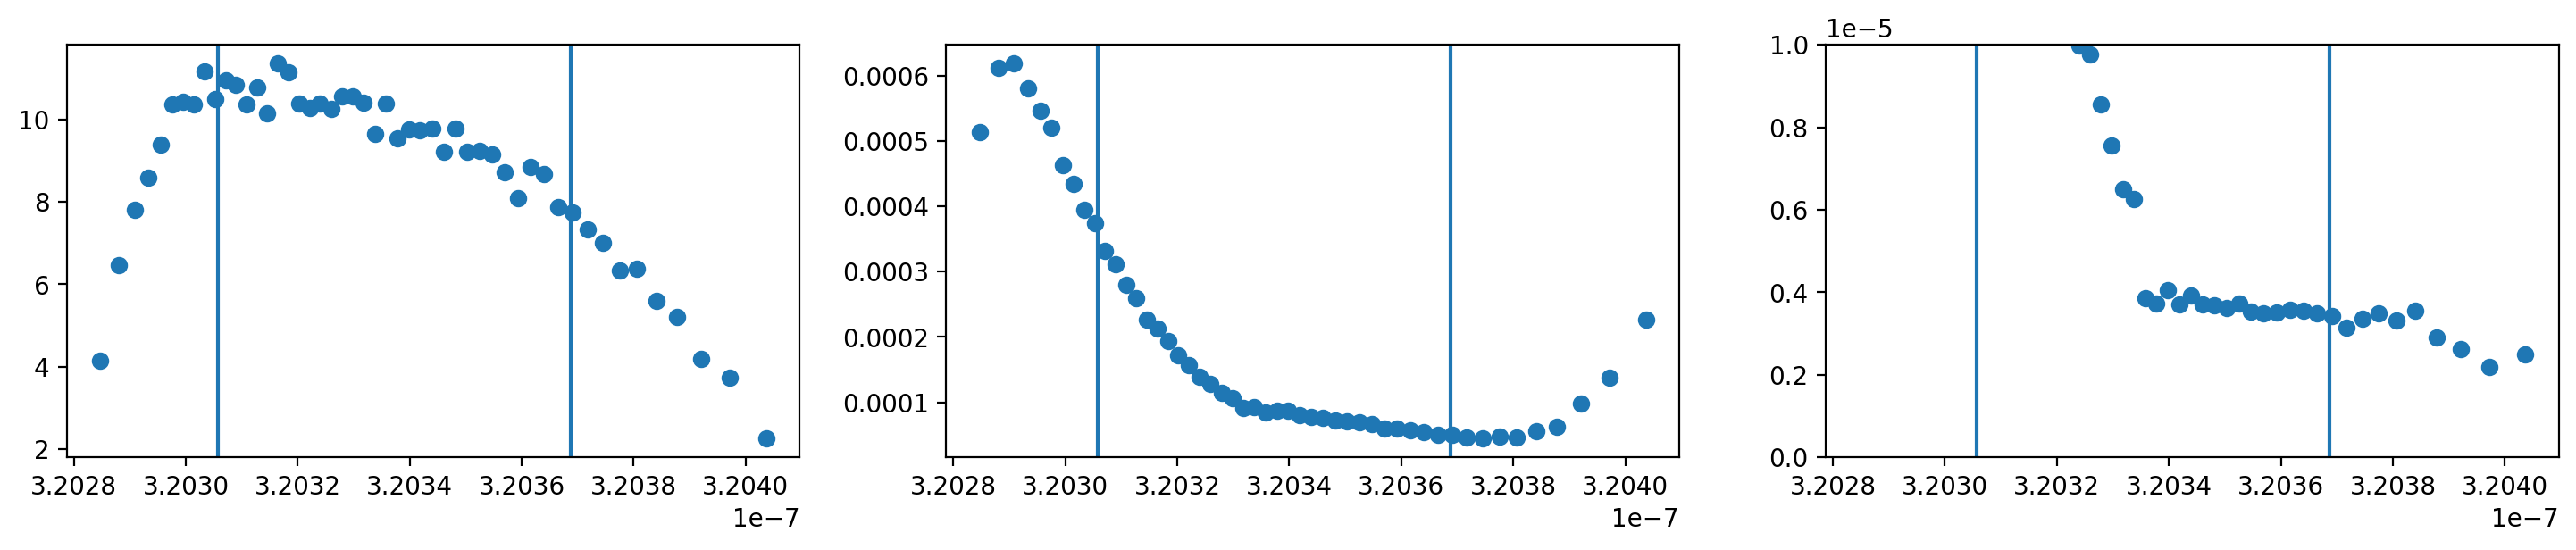

In [93]:
stat = P6.slice_statistics('sigma_pz', 'norm_emit_x',n_slice=50)

fig, axes = plt.subplots(1,3,figsize=(18,3))
axes[0].scatter(stat['mean_t'], stat['current'])
axes[0].axvline(P6['mean_t']-P6['sigma_t'])
axes[0].axvline(P6['mean_t']+P6['sigma_t'])

axes[1].scatter(stat['mean_t'], stat['sigma_pz']/P6['mean_pz'])
axes[1].axvline(P6['mean_t']-P6['sigma_t'])
axes[1].axvline(P6['mean_t']+P6['sigma_t'])

axes[2].scatter(stat['mean_t'], stat['norm_emit_x'])
axes[2].axvline(P6['mean_t']-P6['sigma_t'])
axes[2].axvline(P6['mean_t']+P6['sigma_t'])

axes[2].set_ylim([0,10e-6])

In [126]:
def rms(arr, target):
    return np.sqrt(np.average( (arr-target)**2 ))

def calculate_error(P):
    targets = [10, 1e-4, 2.8e-6]
    slice_stat = P.slice_statistics('sigma_pz', 'norm_emit_x', n_slice=50)
    slice_stat['sigma_pz'] /= P['mean_pz']
    center = ((stat['mean_t'] > (P['mean_t']-P['sigma_t'])) & (stat['mean_t'] < (P['mean_t']+P['sigma_t'])) )

    current = rms(slice_stat['current'][center], targets[0])
    slice_pz = rms(slice_stat['sigma_pz'][center], targets[1])
    slice_emit_x = rms(slice_stat['norm_emit_x'][center], targets[2])
    return current/targets[0], slice_pz/targets[1], slice_emit_x/targets[2]

In [127]:
calculate_error(P6)

(0.08755140733768589, 0.8571692980737349, 3.0440127108222113)

In [43]:
arr=np.array([2,9,3,18,4,33,5,44,6,47,7,53,9,59,11,67,18,68,25,69,30,70,35,71,41,74,43,77,45,79,53,82,55,88,57,95,66,96,74,97,82,98,107,99,109,100,123,101,130,102,130,103,144,104,152,105,161,106,172,107,172,108,186,109,193,110,206,111,207,112])

In [41]:
even = np.arange(0,70,2)
odd = np.arange(1,70,2)

In [45]:
ix_drift=arr[even]
time_drift=arr[odd]

In [46]:
ix_track = [2,3,4,5,6,7,8,9,10,11,12,17,20,25,29,32,35,41]
time_track = [14,41,66,82,95,111,177,189,237,245,258,259,260,261,262,264,265,273]

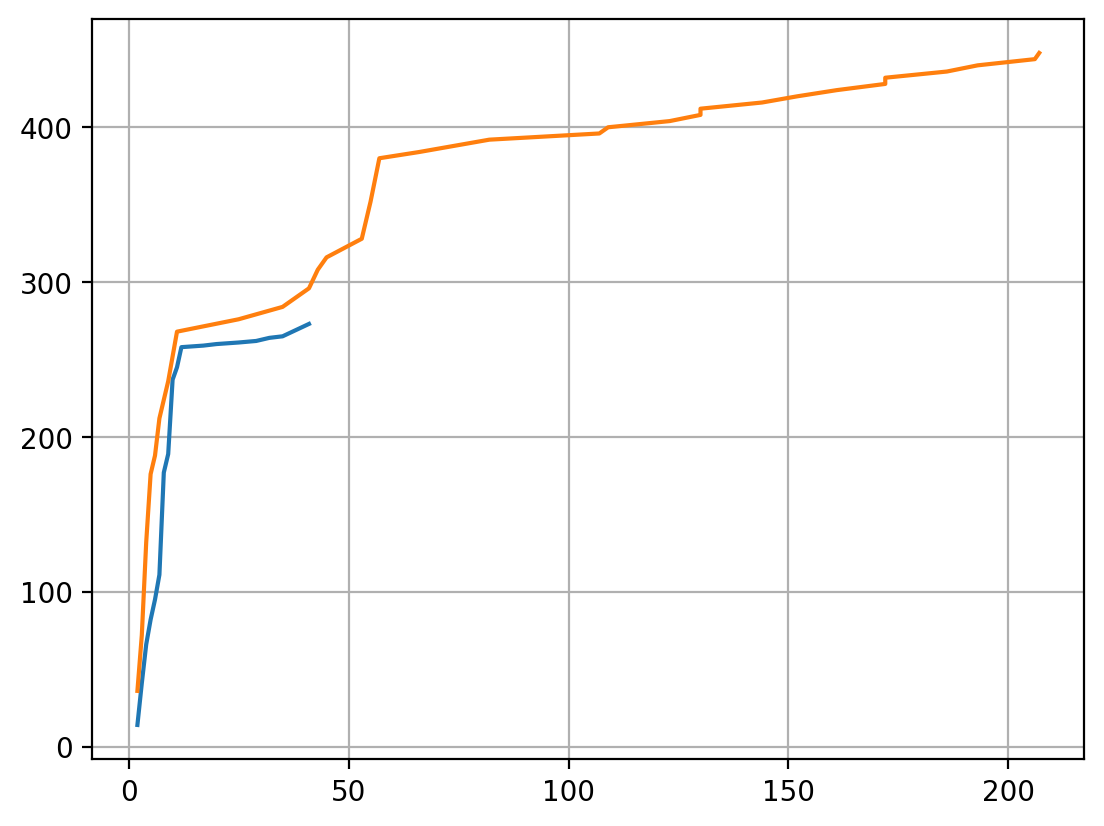

In [49]:
plt.plot(ix_track,time_track)
plt.plot(ix_drift,time_drift*4)
plt.grid()